In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyspedas as psd
import matplotlib.dates as mdates
from datetime import datetime, date
import cdflib
from astropy.time import TimeDelta, Time
from astropy import units as u
import plotly.graph_objects as go
import math
import urllib.request
import warnings
from contextlib import suppress
from matplotlib import cm
from matplotlib.ticker import MultipleLocator, LogLocator 
from dateutil.parser import parse
import requests
import statistics
import os
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
  

#set plots' axes' tick label sizes globally
plt.rc('xtick', labelsize = 30)
plt.rc('ytick', labelsize = 30)

PyPI PyTplot Version
1.7.9
Your PyTplot Version in C:\Users\Omistaja\AppData\Roaming\Python\Python37\site-packages\pytplot
1.3.4


****************************** WARNING! ******************************
*                                                                    *
*          You are running an outdated version of PyTplot.           *
*              Sync your module for the latest updates.              *
*                                                                    *
****************************** WARNING! ******************************


In [3]:
def info_software(path_to_software_infotxt):
    '''
    path_to_software_infotxt: 
    Path exemple: 'C:/Users/Desktop/folder'
    Use r before the quotation marks if using the back slash in the path name. 
    This cancels out any special python characters.
    Or use  / as in the example instead.
    '''
    
    file = open(path_to_software_infotxt) 
    for line in file: 
        print(line,)

In [4]:
def retrieve_data(path_to_folder, date, instrument, data = '', rate = ''):
    
    '''
    This function retrieves the data from the PSP database for a chosen date, instrument and resolution (rate).
    The database has 3 main folders EPI-Hi, EPI-Lo, ISOIS
    EPI-Hi: data separated in LET1, LET2 and HET, rate: 10s, 60s, 300s, 3600s and one second rate
    EPI-Lo: data separated in pe (particle energy) and ic (ion composition), resolution varies and cannot be chosen separately
    ISOIS: contains a summary of the data
    
    To retrieve the data from the database, you need to input five variables in the following order:
     
    1. path_to_folder: Choose a folder in your computer where you want to save the data.
    The data will be automatically saved in the chosen folder as a cdf file. 
    The files will be named with the exact name they have in the database.
    Path exemple: 'C:/Users/Desktop/folder'
    Use r before the quotation marks if using the back slash in the path name. 
    This cancels out any special python characters.
    Or use  / as in the example instead.
    
    2. date: Input the date as a string in the form: 'YYYYMMDD'
    
    3. instrument: For the instrument, input (as a string) either 'epihi', 'epilo' or 'isois' 
    
    4. data: input (as a string):
    for EPI-Hi: 'let1', 'let2' or 'het' (if you wish to retreive 1s data no input needed)
    for EPI-Lo: 'ic' or 'pe'
    for ISOIS: no input needed
    
    5. rate (resolution): 
    for EPI-Hi: 'rates10', 'rates60', 'rates300', 'rates3600' or just 'rates' for 1s 
    for EPI-Lo: no input needed
    for ISOIS: no input needed'
    

    '''
    
    urll = "http://spp-isois.sr.unh.edu/data_public/"+instrument[0:len(instrument)-1].upper()+instrument[len(instrument)-1]+"/level2/"
    page = requests.get(urll)    
    dat = page.text
    a = dat.find('.cdf')
    b = a-10
    c = dat[b:a].find('_')
    version = dat[b+c+1:a]


    try:
        if instrument == 'isois':
            #ISOIS
            url = 'http://spp-isois.sr.unh.edu/data_public/ISOIS/level2/psp_isois_l2-summary_'+date+'_'+version+'.cdf'
            name = r"\name"+url[url.rfind('/')+1: len(url)]
            name = name[0]+name[5:len(name)]
            # checking if file already exists  
            if os.path.exists(path_to_folder+name):
                print('File already present')
                print('Path to file: '+ path_to_folder+name)
            else:
                urllib.request.urlretrieve(url, path_to_folder+name)
                print('File saved succesfuly as '+ name[1:len(name)])
                print('Path to file: '+ path_to_folder+name)
        elif instrument == 'epilo':
            url = 'http://spp-isois.sr.unh.edu/data_public/'+instrument[0:len(instrument)-1].upper()+instrument[len(instrument)-1]+'/level2/psp_isois-'+instrument+'_l2-'+data+'_'+date+'_'+version+'.cdf'
            name = r"\name"+url[url.rfind('/')+1: len(url)]
            name = name[0]+name[5:len(name)]
            if os.path.exists(path_to_folder+name):
                print('File already present')
                print('Path to file: '+ path_to_folder+name)
            else:
                urllib.request.urlretrieve(url, path_to_folder+name)
                print('File saved succesfuly as '+ name[1:len(name)])
                print('Path to file: '+ path_to_folder+name)
        elif instrument == 'epihi':
            if rate == 'rates':
                url = 'http://spp-isois.sr.unh.edu/data_public/'+instrument[0:len(instrument)-1].upper()+instrument[len(instrument)-1]+'/level2/psp_isois-'+instrument+'_l2-second-'+rate+'_'+date+'_'+version+'.cdf'
                name = r"\name"+url[url.rfind('/')+1: len(url)]
                name = name[0]+name[5:len(name)]
                if os.path.exists(path_to_folder+name):
                    print('File already present')
                    print('Path to file: '+ path_to_folder+name)
                else:
                    urllib.request.urlretrieve(url, path_to_folder+name)
                    print('File saved succesfuly as '+ name[1:len(name)])
                    print('Path to file: '+ path_to_folder+name)
        
            else:   
                url = 'http://spp-isois.sr.unh.edu/data_public/'+instrument[0:len(instrument)-1].upper()+instrument[len(instrument)-1]+'/level2/psp_isois-'+instrument+'_l2-'+data+'-'+rate+'_'+date+'_'+version+'.cdf'
                name = r"\name"+url[url.rfind('/')+1: len(url)]
                name = name[0]+name[5:len(name)]
                if os.path.exists(path_to_folder+name):
                    print('File already present')
                    print('Path to file: '+ path_to_folder+name)
                else:
                    urllib.request.urlretrieve(url, path_to_folder+name)
                    print('File saved succesfuly as '+ name[1:len(name)])
                    print('Path to file: '+ path_to_folder+name)
        
    except:
        print('The file for '+date+', '+instrument+', '+data+', '+rate+' is not available, check your input or choose another date!')
    


In [5]:
def get_zvariables(name_of_cdf):
    '''
    This function outputs all the zVariables in the opened cdf along with some basic information.
    For more metadata use the get_info function.
    
    Input: name_of_cdf 
    name_of_cdf = the name given to the cdf when opened in a notebook (or cmd line)
    e.g. name_of_cdf = cdflib.CDF(r'path_to_folder')
    The path_to_folder is output when retrieving the data from the database using the retrieve_data function.
    '''
    info = name_of_cdf.cdf_info()
    #list of all the zVariables
    zVar = info.get('zVariables')
    for i in zVar:
        print(i," : ",name_of_cdf.varinq(i),'\n')


In [6]:
def get_info(name_of_cdf, variable = 'all'):
    '''
    This function outputs the info for a chosen variable.
    
    Input variables:
    1. name_of_cdf = the name given to the cdf when opened in a notebook
    e.g. name_of_cdf = cdflib.CDF(r'path_to_folder')
    The path_to_folder is output when retrieving the data from the database using the retrieve_data function.
    
    2. variable: If you wish to retrieve the information for all the variables, no second input needed.
    Otherwise, input the name of the variable you are intrested in getting the information about.

    To check the variable names use the get_zvariables function.
    '''
    
    info = name_of_cdf.cdf_info()
    zVar = info.get('zVariables')
    if variable == 'all':
        for i in zVar:
            print(i," : ",name_of_cdf.varattsget(i),'\n')
    else:
        print(variable, " : ", name_of_cdf.varattsget(variable),'\n' )



In [7]:
def get_data(name_of_cdf, variable = 'all'):
    
    '''
    This function outputs the data for a chosen variable.
    
    Input variables:
    1. name_of_cdf = the name given to the cdf when opened in a notebook
    e.g. name_of_cdf = cdflib.CDF(r'path_to_folder')
    The path_to_folder is output when retrieving the data from the database using the retrieve_data function.
    
    2. If you wish to retrieve the data for all the variables, no second input needed.
    Otherwise, input the name of the variable you are intrested in getting the data of.

    To check the variable names use the get_zvariables function.
    '''
    info = name_of_cdf.cdf_info()
    zVar = info.get('zVariables')
    if variable == 'all':
        for i in zVar:
            print(i," : ",name_of_cdf.varget(i),'\n')
    else:
        print(variable, ' : ', name_of_cdf.varget(variable), '\n' )


In [8]:
def energy_channels(name_of_cdf):
    '''
    
    This function prints out the energy channels for each particle in the cdf file.
    
    !!! Currently works only for EPI-Hi data !!!
    
    Input variable:
    cdf_name = the name given to the cdf when opened in a notebook
    e.g. name_of_cdf = cdflib.CDF(r'path_to_folder')
    The path_to_folder is output when retrieving the data from the database using the retrieve_data function.
    
    
    '''
    
    
    
    #H energy channels
    energy_H = name_of_cdf.varget("H_ENERGY")
    deltaminus_H = name_of_cdf.varget('H_ENERGY_DELTAMINUS')
    deltaplus_H = name_of_cdf.varget('H_ENERGY_DELTAPLUS')
    
    
    range_minus_H = []
    range_plus_H  = []
    bin_number_H = []
    
    for i in range(energy_H.size):
        range_minus_H.append(energy_H[i]-deltaminus_H[i])
        range_plus_H.append(energy_H[i]+deltaplus_H[i])
        bin_number_H.append(i)
       
    
    
    energy_Hh = [ '%.2f' % elem for elem in energy_H ]
    range_minus_Hh = [ '%.2f' % elem for elem in range_minus_H ]
    range_plus_Hh = [ '%.2f' % elem for elem in range_plus_H ]
    deltaminus_Hh = [ '%.2f' % elem for elem in deltaminus_H ]
    deltaplus_Hh = [ '%.2f' % elem for elem in deltaplus_H ]
            
        
    
    H_energy_channels = {'bin_number_H':bin_number_H,'H_energy_channels': energy_Hh,'delta_minus':deltaminus_Hh, 'delta_plus':deltaplus_Hh, 'energy_channel_from':range_minus_Hh,'energy_channel_to':range_plus_Hh}
    df_H_energy_channels = pd.DataFrame(H_energy_channels, columns =['bin_number_H','H_energy_channels','delta_minus', 'delta_plus', 'energy_channel_from','energy_channel_to'])
    fig_H = go.Figure(data=[go.Table(
        header=dict(values=list(df_H_energy_channels.columns),
        fill_color='aqua',
        align='left'),
        cells=dict(values=[df_H_energy_channels.bin_number_H, df_H_energy_channels.H_energy_channels, df_H_energy_channels.delta_minus, df_H_energy_channels.delta_plus, df_H_energy_channels.energy_channel_from, df_H_energy_channels.energy_channel_to],
        fill_color='white',
        align='left'))])
    
    fig_H.show()


    #He energy channels
    energy_He = name_of_cdf.varget("He_ENERGY")
    deltaminus_He = name_of_cdf.varget('He_ENERGY_DELTAMINUS')
    deltaplus_He = name_of_cdf.varget('He_ENERGY_DELTAPLUS')
    range_minus_He = []
    range_plus_He  = []
    bin_number_He = []
    for j in range(energy_He.size):
        range_minus_He.append(energy_He[j]-deltaminus_He[j])
        range_plus_He.append(energy_He[j]+deltaplus_He[j])
        bin_number_He.append(j)
        
        
    energy_He_formatted = [ '%.2f' % elem for elem in energy_He ]
    range_minus_He_formatted = [ '%.2f' % elem for elem in range_minus_He ]
    range_plus_He_formatted = [ '%.2f' % elem for elem in range_plus_He ]
    deltaminus_He_formatted = [ '%.2f' % elem for elem in deltaminus_He ]
    deltaplus_He_formatted = [ '%.2f' % elem for elem in deltaplus_He ]
        
    He_energy_channels = {'bin_number_He':bin_number_He,'He_energy_channels': energy_He_formatted,'delta_minus':deltaminus_He_formatted, 'delta_plus':deltaplus_He_formatted, 'energy_channel_from':range_minus_He_formatted,'energy_channel_to':range_plus_He_formatted}
    df_He_energy_channels = pd.DataFrame(He_energy_channels, columns =['bin_number_He','He_energy_channels','delta_minus', 'delta_plus', 'energy_channel_from','energy_channel_to'])
    fig_He = go.Figure(data=[go.Table(
        header=dict(values=list(df_He_energy_channels.columns),
        fill_color='aqua',
        align='left'),
        cells=dict(values=[df_He_energy_channels.bin_number_He,df_He_energy_channels.He_energy_channels, df_He_energy_channels.delta_minus, df_He_energy_channels.delta_plus, df_He_energy_channels.energy_channel_from, df_He_energy_channels.energy_channel_to],
        fill_color='white',
        align='left'))])
    
    fig_He.show()
    
    # Electrons energy channels
    try:
        warnings.filterwarnings("ignore")
        energy_e = name_of_cdf.varget("Electrons_ENERGY")
        deltaminus_e = name_of_cdf.varget('Electrons_ENERGY_DELTAMINUS')
        deltaplus_e = name_of_cdf.varget('Electrons_ENERGY_DELTAPLUS')
            
        range_minus_e = []
        range_plus_e  = []
        bin_number_e = []
            
            
        for k in range(energy_e.size):
            warnings.filterwarnings("ignore")
            range_minus_e.append(energy_e[k]-deltaminus_e[k])
            range_plus_e.append(energy_e[k]+deltaplus_e[k])
            bin_number_e.append(k)    
                
        
        energy_e_formatted = [ '%.2f' % elem for elem in energy_e ]
        range_minus_e_formatted = [ '%.2f' % elem for elem in range_minus_e ]
        range_plus_e_formatted = [ '%.2f' % elem for elem in range_plus_e ]
        deltaminus_e_formatted = [ '%.2f' % elem for elem in deltaminus_e ]
        deltaplus_e_formatted = [ '%.2f' % elem for elem in deltaplus_e ]
    
        
        e_energy_channels = {'bin_number_e':bin_number_e,'Electrons_energy_channels': energy_e_formatted,'delta_minus':deltaminus_e_formatted, 'delta_plus':deltaplus_e_formatted, 'energy_channel_from':range_minus_e_formatted,'energy_channel_to':range_plus_e_formatted}
        df_e_energy_channels = pd.DataFrame(e_energy_channels, columns =['bin_number_e','Electrons_energy_channels','delta_minus', 'delta_plus', 'energy_channel_from','energy_channel_to'])
        fig_e = go.Figure(data=[go.Table(
            header=dict(values=list(df_e_energy_channels.columns),
            fill_color='aqua',
            align='left'),
            cells=dict(values=[df_e_energy_channels.bin_number_e, df_e_energy_channels.Electrons_energy_channels, df_e_energy_channels.delta_minus, df_e_energy_channels.delta_plus, df_e_energy_channels.energy_channel_from, df_e_energy_channels.energy_channel_to],
            fill_color='white',
            align='left'))])
            
        fig_e.show()
        
    except:
        print('Done!')
   
                


In [9]:
def average_data(cdf_name, variable, wanted_resolution, data_resolution , particle= ''):
    '''
    This function creates an averaged dataframe for a chosen variable.
    This function works for all data (Flux, Rate, Pitch Angle and RTN/HGC/HCI data)
    
    Input variables:
    1. cdf_name = the name given to the cdf when  opened in a notebook
    e.g. name_of_cdf = cdflib.CDF(r'path_to_folder')
    The path_to_folder is output when retrieving the data from the database using the retrieve_data function.
    
    2. variable:  the variable you wish to average, for exemple 'C_H_Flux'
    you can check all the variables in the cdf using the get_zvariables function.
    
    3. wanted_resolution: input the wanted resolution in seconds as an integer  e.g 300, 3600 etc. 
    
    4. data_resolution: input the resolution of the used data in seconds as an integer.
    For EPI-Hi could be 10s, 60s, 300s, 3600s or one second.
    
    5. particle:  If you are NOT averaging Flux or Count Rate data, no input needed. 
    Otherwise input the particle as a string:
    For EPI-Hi data:
    let1 and let2 : 'H', 'He' or 'electrons'
    het: 'H', 'He' or 'electrons'
    
    '''
    
    av_window = wanted_resolution/data_resolution
    av_window = int(av_window)
    data  = cdf_name.varget(variable)
    t = cdf_name.varget('Epoch')
    epoch = []
    for i in t:
        date_time_str = (Time(2000, format='jyear') + TimeDelta(i*u.ns)).iso
        epoch.append(datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f'))
    
   
    av_epoch = [] 
    if av_window > 0:
        
        for j in np.arange(0, len(epoch), int(av_window)):
            if j == 0: 
                av_epoch.append(epoch[j+(int(av_window/2))])
                av_I   = np.nanmean(data[j:(j+av_window-1)], axis=0)
                
            else:
                av_epoch.append(epoch[j+(int(av_window/2))])
                av_I    = np.row_stack((av_I, np.nanmean(data[j:(j+av_window-1)], axis=0)))
            
            chan_data = av_I
    
    
    if variable.find('Flux')!= -1 or variable.find('Rate')!= -1 :
        labl = particle+'_ENERGY_LABL' 
        df = pd.DataFrame(chan_data)
        df.columns = cdf_name.varget(labl)
        df['epoch'] = av_epoch
        
    # if True data is one dimentional and not matrix    
    elif data.ndim ==1 :
        labl = variable
        df = pd.DataFrame(chan_data, columns = [labl])
        df['epoch'] = av_epoch
        
    elif data.ndim !=1 and variable.find('RTN')!=-1:
        labl = 'label_dir_RTN'
        df = pd.DataFrame(chan_data)
        df.columns = cdf_name.varget(labl)
        df['epoch'] = av_epoch
    
    elif data.ndim !=1 and variable.find('HCI')!=-1:
        labl = 'label_dir_HCI'
        df = pd.DataFrame(chan_data)
        df.columns = cdf_name.varget(labl)
        df['epoch'] = av_epoch
    
        
    elif data.ndim !=1 and variable.find('HGC')!=-1:
        labl = 'label_dir_HGC'
        df = pd.DataFrame(chan_data)
        df.columns = cdf_name.varget(labl)
        df['epoch'] = av_epoch
    
           
    return(df)


In [10]:
def average_data_dataframe(dataframe, wanted_resolution, data_resolution):
    '''
    This function creates an averaged dataframe from a ready made dataframe.
    This function works for all kinds of dataframe, but the first column shouold be epoch.
    
    Input variables:
    1. dataframe = the name of the dataframe you wish to average
     
    2. wanted_resolution: input the wanted resolution in seconds as an integer e.g 300, 3600 etc.
    
    3. data_resolution: input the resolution of the used data as an integer in seconds.
    For EPI-Hi could be 10s, 60s, 300s, 3600s or one second.
    For EPI-Lo you can use the check_resolution function to find out the resolution of the data.
    
    '''
    
    av_window = wanted_resolution/data_resolution
    av_window = int(av_window)
    cols  = dataframe.columns
    
    
    epoch = dataframe[cols[0]]
    av_epoch = [] 
    if av_window > 0:
        for j in np.arange(0, len(epoch), int(av_window)):
            if j == 0: 
                av_epoch.append(epoch[j+(int(av_window/2))])
                
            else:
                if av_window>(len(epoch)-j):
                    av_epoch.append(epoch[j])
                else:
                    av_epoch.append(epoch[j+(int(av_window/2))])
                    
                
            
    
    
    df = pd.DataFrame(av_epoch, columns =['epoch'])
   


   
    if av_window > 0:
        for col in cols.drop(cols[0]):
            coll = dataframe[col]
            for j in np.arange(0, len(dataframe[col]), int(av_window)):
                if j == 0: 
                    av   = np.nanmean(coll[j:(j+av_window-1)], axis=0)
                else:
                    
                    av    = np.row_stack((av, np.nanmean(coll[j:(j+av_window-1)], axis=0)))
            
            chan_data = av
            df[col] = av
    
    
    
 
           
    return(df)


In [11]:
def average_list(lista, wanted_resolution, data_resolution):
    '''
    This function is primarily meant for averaging an epoch list used in other functions in the software.
    
    Input variables:
    1. lista = the name of the list you wish to average
     
    2. wanted_resolution: input the wanted resolution in seconds e.g 300, 3600 etc.as an integer
    
    3. data_resolution: input the resolution of the used data as an integer in seconds.
    For EPI-Hi could be 10s, 60s, 300s, 3600s or one second.
    For EPI-Lo you can use the check_resolution function to find out the resolution of the data.
    
    '''
    av_window = wanted_resolution/data_resolution
    av_window = int(av_window)
    
    av_epoch = [] 
    if av_window > 0:
        for j in np.arange(0, len(lista), int(av_window)):
            if j == 0: 
                av_epoch.append(lista[j+(int(av_window/2))])
                
            else:
                av_epoch.append(lista[j+(int(av_window/2))])
                    
                
              
    return(av_epoch)


In [12]:
def join_dataframes(dataframe_one, dataframe_two):
    '''
    This function is primarily meant to be in other functions in the software. 
    
    This functions concatenates two dataframes.
    
    !!! The dataframe columns must be of the same length!!!
    
    This function can be used to create an averaged dataframe for the pa_flux and multipanel functions.
    
    Input variables:
    
    1. dataframe_one: name of the first dataframe.  e.g dataframe containing the pitch angle
    !!! dataframe_one must constain an epoch column!!!
    
    2. dataframe_two: name of the second dataframe e.g. dataframe containing the fluxes 
    corresponding to the pitch angle of the first dataframe
    
    '''
    t = dataframe_one['epoch']

    del dataframe_one['epoch']
    r = pd.concat([dataframe_one, dataframe_two], axis=1)
    dataframe_one['epoch'] = t
    
    return(r)


In [13]:
def pa_dataframe(cdf_name, particle, direction= ''):
    '''
    This function creates a dataframe that includes the cdf file's epoch, pitch angle and flux for a chosen direction 
    and particle. This dataframe can be used in the pa_fluxes function and is also used in the multipanel function.
    
    Input variables:
    1. cdf_name: the name given to the cdf when opened in a notebook.
    e.g. cdf_name = cdflib.CDF(r'path_to_folder')
    The path_to_folder is output when retrieving the data from the database using the retrieve_data function.
    
    2. particle: the particle of which you want the fluxes of in the dataframe.
    For HET: 'H', 'He' or 'Electrons'
    For LET: 'H' or 'He' (as LET does not have flux data for electrons)
    
    
    3. direction: LET and HET have different viewing directons. 
    HET: 'A' or 'B'
    LET1: 'A' or 'B'
    LET2: 'C' (no input necessary)
    
    direction A is the main look direction for both LET and HET

    
    '''
    
    t = cdf_name.varget('Epoch')
    
    time = []
    for tt in t:
        date_time_str = (Time(2000, format= 'jyear')+ TimeDelta(tt*u.ns)).iso
        time.append(datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f'))
       
        
    data = pd.DataFrame(time, columns = ['epoch'])
    
    if direction == '' or direction == 'C':
        pa = cdf_name.varget('LET2_C_PA')
        data['LET2_C_PA'] = pa
    
    else:
        info = cdf_name.cdf_info()
        zVar = info.get('zVariables')

        i = 0
        for item in zVar:
            if item.find('HET')!=-1:
                i = i+1
        if i==0:
            pa = cdf_name.varget('LET1_'+direction+'_PA')
            data['LET1_'+direction+'_PA'] = pa
            
        else:
            pa = cdf_name.varget('HET_'+direction+'_PA')
            data['HET_'+direction+'_PA'] = pa
            
            
    if direction == '' or direction == 'C':
        flux = cdf_name.varget('C_'+particle+'_Flux')
        labl = cdf_name.varget(particle+'_ENERGY_LABL')
        
        d = pd.DataFrame(flux, columns = labl)
    
    else:
        flux = cdf_name.varget(direction+'_'+particle+'_Flux')
        labl = cdf_name.varget(particle+'_ENERGY_LABL')
        d = pd.DataFrame(flux, columns = labl)

    
    result = pd.concat([data,d], axis = 1)
    return(result)
    


In [14]:
def plot(cdf_name, variable, title = '', ylabel = ''):
    '''
   This function plots the data for any chosen variable from the cdf.
    
    !!! The data will be plotted in the same panel !!! (in case of matrixlike format e.g. flux or count rate)
    
    Input variables:
    1. cdf_name = the name given to the cdf when it's opened in the notebook
    e.g. name_of_cdf = cdflib.CDF(r'path_to_folder')
    The path_to_folder is output when retrieving the data from the database using the retrieve_data function.
    
    2. variable: input the name of the variable you wish to plot from the cdf file 
    (you can check the variable names by using the get_zvariables function ) 
    
    3. title: choose a title for the plot (input not necessary)
    
    4. ylabel: chose a label for the y-axis (input not necessary)
   
    '''
    
    #set plots' axes' tick label sizes globally
    
    t = cdf_name.varget('Epoch')
    time = []
    for i in t:
        date_time_str = (Time(2000, format= 'jyear')+ TimeDelta(i*u.ns)).iso
        time.append(datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f'))
    
    data = cdf_name.varget(variable)
    df = pd.DataFrame(data)
    
    
    if variable.find('Flux')!= -1 or variable.find('Rate')!= -1 :
        if variable.find('Electrons')!=-1:
            labl = 'Electrons_ENERGY_LABL' 
        elif variable.find('He')!=-1:
            labl = 'He_ENERGY_LABL' 
        else:
            labl = 'H_ENERGY_LABL'
        
        df.columns = cdf_name.varget(labl)
          
    # if True data is one dimentional and not matrix    
    elif data.ndim ==1 :
        labl = variable
        df = pd.DataFrame(data, columns = [labl])
        
        
    elif data.ndim !=1 and variable.find('RTN')!=-1:
        labl = 'label_dir_RTN'
        df.columns = cdf_name.varget(labl)
    
    elif data.ndim !=1 and variable.find('HCI')!=-1:
        labl = 'label_dir_HCI'
        df.columns = cdf_name.varget(labl)
    
        
    elif data.ndim !=1 and variable.find('HGC')!=-1:
        labl = 'label_dir_HGC'
        df.columns = cdf_name.varget(labl)
       
    
    plt.rc('xtick', labelsize = 20)
    plt.rc('ytick', labelsize = 20)
    
    col_names = []
    
    for col in df.columns:
        col_names.append(col)
        
    
    fig, axarr = plt.subplots(figsize=[20, 10], sharex=True)
    axarr.set_title(title, size = 20) 
    
    for name in col_names:
        axarr.plot(time, df[name], label= name)
        axarr.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S \n %d-%m-%Y'))
    
    axarr.set_ylabel(ylabel, size = 20)
    

    
    axarr.set_xlabel('UTC', size = 20)  
    axarr.legend(loc = 'center left', prop = {'size':17},  bbox_to_anchor= (1, 0.5) )
       


In [15]:
def plot_pa_flux(let1 = '', let2 = '', het = '', title = '' , e_bins = [] , wanted_resolution = '', data_resolution = ''):
    '''
    This function plots the pitch angles of either LET or HET and the fluxes corresponding to the chosen e-bins of each pitch angle.
    The fluxes for each energy channel will be plotted in a different panel. The colors in which the fluxes are plotted 
    correspond to the pitch angles.
    
    let1 files contain data for the A and B viewing directions of LET and let2 files contain data for the C 
    viewing direction of LET. het has A and B viewing directions.
    
    let1 and let2 data should be plotted together to have all three let viewing directions (A, B and C).
     
    After using the retrieve_data function to retrieve the data for let1, let2 and/or het for a certain date and resolution,
    like so:
    
    retrieve_data(r'C:\Users\Desktop\folder', '20190404', 'epihi', 'let1',  rate = 'rates10')
    retrieve_data(r'C:\Users\Desktop\folder', '20190404', 'epihi', 'let2',  rate = 'rates10')
    retrieve_data(r'C:\Users\Desktop\folder', '20190404', 'epihi', 'het',  rate = 'rates10')
    
    *check the documentation of the retrieve_data function to see how to choose the inputs
    
    You should open the files like so:
    
    let1 = cdflib.CDF(r'C:\Users\Desktop\folder\psp_isois-epihi_l2-let1-rates10_20190404_v07.cdf')
    let2 = cdflib.CDF(r'C:\Users\Desktop\folder\psp_isois-epihi_l2-let2-rates10_20190404_v07.cdf')
    het = cdflib.CDF(r'C:\Users\Desktop\folder\psp_isois-epihi_l2-het-rates10_20190404_v07.cdf')
    
        
    Input variables:
    
    !!! Either input both let1 and let2 or just het !!!
    
    1. let1:  the name given to the let1 cdf when opened in a notebook
    e.g. See above. The path_to_folder is output when retrieving the data from the database using the retrieve_data function.
    You can copy paste it to open the file in the notebook or cmd line.
    
    2. let2:the name given to the let2 cdf when opened in a notebook
    e.g. See above. The path_to_folder is output when retrieving the data from the database using the retrieve_data function.
    You can copy paste it to open the file in the notebook or cmd line.
    
    3. het:the name given to the het cdf when opened in a notebook
    e.g. See above. The path_to_folder is output when retrieving the data from the database using the retrieve_data function.
    You can copy paste it to open the file in the notebook or cmd line. 
    
    4. title: title of the plot as a string
    
    5. e_bins: a list of numbers corresponding to the energy bins you wish to plot.
    To check which number corresponds which energy channel use the energy_channels function.
    This variable should be a list even if you plot just one energy channel. e.g [3] or [0,4,7,10]
    
    6. wanted_resolution: If you DO NOT wish to average the data NO input is necessary. Otherwise:
    input the wanted resolution in seconds as an integer  e.g 300, 3600 etc. 
    
    7. data_resolution:If you DO NOT wish to average the data NO input is necessary. Otherwise:
    input the resolution of the used data in seconds as an integer.
    For EPI-Hi could be 10s, 60s, 300s, 3600s or one second.
    
    '''
    #set plots ax tick label sizes 
    plt.rc('xtick', labelsize = 20)
    plt.rc('ytick', labelsize = 20)
    
    
    if het == '':    
        #LET 1
        time1 = let1.varget("Epoch")
        t1 = []
    
        #changing Epoch to readable UTC u.ns where ns = nanoseconds
        for i in time1:
            date_time_str = (Time(2000, format='jyear') + TimeDelta(i*u.ns)).iso
            t1.append(datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f'))
        
            
        #LET2
    
        time2 = let2.varget("Epoch")
        t2 = []
    
        #changing Epoch to readable UTC u.ns where ns = nanoseconds
        for i in time2:
            date_time_str = (Time(2000, format='jyear') + TimeDelta(i*u.ns)).iso
            t2.append(datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f'))    
            
            
            
        LET2_C_PA = let2.varget('LET2_C_PA')
        LET1_A_PA = let1.varget('LET1_A_PA')
        LET1_B_PA = let1.varget('LET1_B_PA')
        
        data_PA_LET2 = {'epoch' : t2, 'PA' : LET2_C_PA}
        data_PA_LET1 = {'epoch' : t1, 'PA A' : LET1_A_PA, 'PA B' : LET1_B_PA}
        
        pa_data = {'epoch' : t1,'PA A' : LET1_A_PA, 'PA B' : LET1_B_PA, 'PA C' : LET2_C_PA}
        
        if wanted_resolution!= '':
            #averaging H flux data
            da = average_data(let1, 'A_H_Flux', wanted_resolution, data_resolution , 'H')
            db = average_data(let1, 'B_H_Flux', wanted_resolution, data_resolution , 'H')
            dc = average_data(let2, 'C_H_Flux', wanted_resolution, data_resolution , 'H') 
            
        if wanted_resolution == '':
            data = pd.DataFrame(t1, columns = ['epoch'])
            datb = pd.DataFrame(t1, columns = ['epoch'])
            datc = pd.DataFrame(t2, columns = ['epoch'])
            
            fluxa = let1.varget('A_H_Flux')
            fluxb = let1.varget('B_H_Flux')
            fluxc = let2.varget('C_H_Flux')
            
            lablab = let1.varget('H_ENERGY_LABL')
            lablc  = let2.varget('H_ENERGY_LABL')
            
            daa = pd.DataFrame(fluxa, columns = lablab)
            da = pd.concat([data,daa], axis = 1)
            
            dab = pd.DataFrame(fluxb, columns = lablab)
            db = pd.concat([datb,dab], axis = 1)
            
            dac = pd.DataFrame(fluxc, columns = lablc)
            dc = pd.concat([datc,dac], axis = 1)
            
        
   
        col_pa = []
        for column in pa_data:
            col_pa.append(column)
        
        col_pa.remove('epoch')
        
        cola_names = []
        for col_a in da.columns:
            cola_names.append(col_a)
            
        cola_names.remove('epoch')
        
        colb_names = []
        for col_b in db.columns:
            colb_names.append(col_b)
            
        colb_names.remove('epoch')
        
        colc_names = []
        for col_c in dc.columns:
            colc_names.append(col_c)
            
        colc_names.remove('epoch')
        
        colours = ['red', 'blue', 'green']
        
      
        c = 0
        
        fig, axarr = plt.subplots(len(e_bins)+1, figsize=[20, 30], sharex=True)
        axarr[0].set_title(title, size = 20) 
        
        
        
        for n in col_pa:
            axarr[0].plot(pa_data["epoch"], pa_data[n], color = colours[c], label= n )
            c = c+1
            axarr[0].axhline(y=45, ls='-', color='black')
            axarr[0].axhline(y=90, ls='-', color='black')
            axarr[0].axhline(y=135, ls='-', color='black')
            
            axarr[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
            axarr[0].legend(loc = 'center left', prop = {'size':17},  bbox_to_anchor= (1, 0.5) )
                  
            
        
        c = 0
        e = 0
        for x in range(len(e_bins)):
            axarr[x+1].plot(da["epoch"], da[cola_names[e_bins[e]]], color = colours[c], label= cola_names[e])
            axarr[x+1].plot(db["epoch"], db[colb_names[e_bins[e]]], color = colours[c+1], label= colb_names[e])
            axarr[x+1].plot(dc["epoch"], dc[colc_names[e_bins[e]]], color = colours[c+2], label= colc_names[e])
            c = 0
            e = e+1
            
            axarr[x+1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S \n %d-%m-%y'))
            axarr[x+1].set_yscale('log')
            axarr[x+1].legend(loc = 'center left', prop = {'size':17},  bbox_to_anchor= (1, 0.5) )
            axarr[x+1].set_ylabel('Intensities \n cm$^{-2}$ sr$^{-1}$ s$^{-1}$ \n (MeV/nuc)$^{-1}$', size = 20)
            axarr[x+1].set_ylim([0.01,10])
        
        
        axarr[0].set_ylabel('Pitch\nAngle ('+r'$\mathregular{^\circ}$'+')', size = 20)  
        
        axarr[len(e_bins)].set_xlabel('UTC', size = 20) 
        fig.subplots_adjust(hspace=0.05)
        
    if het != '':
        
        time1 = het.varget("Epoch")
        t1 = []
    
        #changing Epoch to readable UTC u.ns where ns = nanoseconds
        for i in time1:
            date_time_str = (Time(2000, format='jyear') + TimeDelta(i*u.ns)).iso
            t1.append(datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f'))
             
            
        HET_A_PA = het.varget('HET_A_PA')
        HET_B_PA = het.varget('HET_B_PA')
        
        pa_data = {'epoch' : t1, 'PA A' : HET_A_PA, 'PA B' : HET_B_PA}
        
    
        if wanted_resolution!= '':
            #averaging H flux data
            da = average_data(het, 'A_H_Flux', wanted_resolution, data_resolution , 'H')
            db = average_data(het, 'B_H_Flux', wanted_resolution, data_resolution , 'H')
            
        if wanted_resolution == '':
            data = pd.DataFrame(t1, columns = ['epoch'])
            datb = pd.DataFrame(t1, columns = ['epoch'])
            
            fluxa = het.varget('A_H_Flux')
            fluxb = het.varget('B_H_Flux')
            
            labl = het.varget('H_ENERGY_LABL')
            
            daa = pd.DataFrame(fluxa, columns = labl)
            da = pd.concat([data,daa], axis = 1)
            
            dab = pd.DataFrame(fluxb, columns = labl)
            db = pd.concat([datb,dab], axis = 1)
            
            
   
        col_pa = []
        for column in pa_data:
            col_pa.append(column)
        
        col_pa.remove('epoch')
        
        cola_names = []
        for col_a in da.columns:
            cola_names.append(col_a)
            
        cola_names.remove('epoch')
        
        colb_names = []
        for col_b in db.columns:
            colb_names.append(col_b)
            
        colb_names.remove('epoch')
        
        
        colours = ['red', 'blue']
        
      
        c = 0
        
        fig, axarr = plt.subplots(len(e_bins)+1, figsize=[20, 30], sharex=True)
        axarr[0].set_title(title, size = 20) 
        
        
        
        for n in col_pa:
            axarr[0].plot(pa_data["epoch"], pa_data[n], color = colours[c], label= n )
            c = c+1
            axarr[0].axhline(y=45, ls='-', color='black')
            axarr[0].axhline(y=90, ls='-', color='black')
            axarr[0].axhline(y=135, ls='-', color='black')
            
            axarr[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
            axarr[0].legend(loc = 'center left', prop = {'size':17},  bbox_to_anchor= (1, 0.5) )
                  
            
        
        c = 0
        e = 0
        for x in range(len(e_bins)):
            axarr[x+1].plot(da["epoch"], da[cola_names[e_bins[e]]], color = colours[c], label= cola_names[e])
            axarr[x+1].plot(db["epoch"], db[colb_names[e_bins[e]]], color = colours[c+1], label= colb_names[e])
            c = 0
            e = e+1
            
            axarr[x+1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S \n %d-%m-%y'))
            axarr[x+1].set_yscale('log')
            axarr[x+1].legend(loc = 'center left', prop = {'size':17},  bbox_to_anchor= (1, 0.5) )
            axarr[x+1].set_ylabel('Intensities \n cm$^{-2}$ sr$^{-1}$ s$^{-1}$ \n (MeV/nuc)$^{-1}$', size = 20)
            axarr[x+1].set_ylim([0.01,10])
        
        
        axarr[0].set_ylabel('Pitch\nAngle ('+r'$\mathregular{^\circ}$'+')', size = 20)  
        
        axarr[len(e_bins)].set_xlabel('UTC', size = 20) 
        fig.subplots_adjust(hspace=0.05)
        
    
 

In [16]:
def spec_plot_pa(let1 = '', let2 = '', het = '',  title='', colorbar=True, ylabel='Pitch\nAngle ('+r'$\mathregular{^\circ}$'+')', colbar_orientation='horizontal', even_limits=False, colorbar_label=True, colormap=cm.inferno):
    '''
    
    This function creates a spectrogram of the flux for each pitch angle of either LET or HET.
    
    let1 files contain data for the A and B viewing directions of LET and let2 files contain data for the C 
    viewing direction of LET. het has A and B viewing directions.
    
    let1 and let2 data should be plotted together to have all three let viewing directions (A, B and C). 
    So if you are plotting let data you should have an input for both let1 and let2. 
    The input variables are explained below.
     
    After using the retrieve_data function to retrieve the data for let1, let2 and/or het for a certain date and resolution,
    e.g. like so:
    
    retrieve_data(r'C:\Users\Desktop\folder', '20190404', 'epihi', 'let1',  rate = 'rates10')
    retrieve_data(r'C:\Users\Desktop\folder', '20190404', 'epihi', 'let2',  rate = 'rates10')
    retrieve_data(r'C:\Users\Desktop\folder', '20190404', 'epihi', 'het',  rate = 'rates10')
    
    *check the documentation of the retrieve_data function to see how to choose the inputs
    
    You should open the files like so:
    
    let1 = cdflib.CDF(r'C:\Users\Desktop\folder\psp_isois-epihi_l2-let1-rates10_20190404_v07.cdf')
    let2 = cdflib.CDF(r'C:\Users\Desktop\folder\psp_isois-epihi_l2-let2-rates10_20190404_v07.cdf')
    het = cdflib.CDF(r'C:\Users\Desktop\folder\psp_isois-epihi_l2-het-rates10_20190404_v07.cdf')
    
        
    Input variables:
    
    !!! Either input both let1 and let2 or just het !!!
    
    1. let1:  the name given to the let1 cdf when opened in a notebook
    e.g. See above. The path_to_folder is output when retrieving the data from the database using the retrieve_data function.
    You can copy paste it to open the file in the notebook or cmd line.
    
    2. let2:the name given to the let2 cdf when opened in a notebook
    e.g. See above. The path_to_folder is output when retrieving the data from the database using the retrieve_data function.
    You can copy paste it to open the file in the notebook or cmd line.
    
    3. het:the name given to the het cdf when opened in a notebook
    e.g. See above. The path_to_folder is output when retrieving the data from the database using the retrieve_data function.
    You can copy paste it to open the file in the notebook or cmd line. 
    
    4. title: title of the plot as a string (if colorbar_orientation = horizontal it will cover the title)
    
    5. colorbar: leave to True
    
    6. ylabel: should be a string. No need to change it. It's the flux unists by default.
    
    7. colbar_orientation: 'horizontal' or 'vertical' 
    
    8. even_limits leave to False
    
    9. colorbar_label: True if you want to label the colorbar or False 
    
    10. colormap: can be any of the matplotlib colormaps e.g. cm.inferno, cm.jet 
        link: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    
    
    
    '''
    if het == '':    
        #LET 1
        time1 = let1.varget("Epoch")
        t1 = []
    
        #changing Epoch to readable UTC u.ns where ns = nanoseconds
        for i in time1:
            date_time_str = (Time(2000, format='jyear') + TimeDelta(i*u.ns)).iso
            t1.append(datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f'))
            
            
        LET2_C_PA = let2.varget('LET2_C_PA')
        LET1_A_PA = let1.varget('LET1_A_PA')
        LET1_B_PA = let1.varget('LET1_B_PA')
        

        #need to make three dataframes or matrixes with epoch, pa and intensity data
        # not using averaged data for now 
        # epoch is t1
    
        pData = {'pa_A' : LET1_A_PA, 'pa_B' : LET1_B_PA,'pa_C' : LET2_C_PA }
        paData = pd.DataFrame(pData)
    
        intensitiesA = let1.varget("A_H_Flux")
        intensitiesB = let1.varget("B_H_Flux")
        intensitiesC = let2.varget("C_H_Flux")
    
        intA = []
        intB = []
        intC = []
    
        for i in range(len(t1)):
            intA.append(intensitiesA[i][1])
            intB.append(intensitiesB[i][1])
            intC.append(intensitiesC[i][1])
        

        iData = {"int_a" : intA,"int_b" : intB,"int_c" : intC }

        intData = pd.DataFrame(iData)

        
        grid = 180
        opening = 45       

    
        cols = list(paData.columns)
        colss = list(intData.columns)

        hist = np.zeros((len(t1), grid))-99

        for i in range(0, len(t1)):
    #   master_bin is a list from 1 to 180
            master_bin = np.arange(grid)+1


    #   stick position 
            stickpos = np.where((master_bin > paData[cols[0]][i]-opening/2.) &  (master_bin < paData[cols[0]][i]+opening/2.))[0]
    
            bin1 = np.zeros(grid)-99
            bin1[stickpos] = intData[colss[0]][i]
            bin1[np.where(bin1 ==-99)[0]] = np.nan


            stickpos = np.where((master_bin > paData[cols[1]][i]-opening/2.) &  (master_bin < paData[cols[1]][i]+opening/2.))[0]
    
            bin2 = np.zeros(grid)-99
            bin2[stickpos] = intData[colss[1]][i]
            bin2[np.where(bin2 ==-99)[0]] = np.nan
            
            stickpos = np.where((master_bin > paData[cols[2]][i]-opening/2.) &  (master_bin < paData[cols[2]][i]+opening/2.))[0]
            #     print(stickpos)
            bin3 = np.zeros(grid)-99
            bin3[stickpos] = intData[colss[2]][i]
            bin3[np.where(bin3 ==-99)[0]] = np.nan
    

            non99 = np.zeros(grid)
    
            non99[np.where(np.isnan(bin1)==False)[0]]= non99[np.where(np.isnan(bin1)==False)[0]]+1
            non99[np.where(np.isnan(bin2)==False)[0]]= non99[np.where(np.isnan(bin2)==False)[0]]+1
           
            non99[np.where(np.isnan(bin3)==False)[0]]= non99[np.where(np.isnan(bin3)==False)[0]]+1
            non99[np.where(non99==0)[0]]= 1
    
            for j in range(len(bin1)):
                if (np.isnan(bin1[j]) and np.isnan(bin2[j]) == False and np.isnan(bin3[j])==False):
                    bin1[j] = 0
                if (np.isnan(bin1[j]) == False and np.isnan(bin2[j]) and np.isnan(bin3[j])==False):
                    bin2[j] = 0
                if (np.isnan(bin1[j]) == False and np.isnan(bin2[j]) == False and np.isnan(bin3[j])):
                    bin3[j] = 0
                if (np.isnan(bin1[j]) and np.isnan(bin2[j]) and np.isnan(bin3[j]) == False):
                    bin1[j] = 0
                    bin2[j] = 0
                if (np.isnan(bin1[j]) and np.isnan(bin2[j]) == False and np.isnan(bin3[j])):
                    bin1[j] = 0
                    bin3[j] = 0
                if (np.isnan(bin1[j]) == False and np.isnan(bin2[j]) and np.isnan(bin3[j])):
                    bin2[j] = 0
                    bin3[j] = 0
    
    
            hist[i] = (bin1+bin2+bin3) / non99
        
        
    if het != '':    
        #HET 
        time1 = het.varget("Epoch")
        t1 = []
    
        #changing Epoch to readable UTC u.ns where ns = nanoseconds
        for i in time1:
            date_time_str = (Time(2000, format='jyear') + TimeDelta(i*u.ns)).iso
            t1.append(datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f'))
          
        HET_A_PA = het.varget('HET_A_PA')
        HET_B_PA = het.varget('HET_B_PA')
        
        #need to make three dataframes or matrixes with epoch, pa and intensity data
        # not using averaged data for now 
        # epoch is t1
    
        pData = {'pa_A' : HET_A_PA, 'pa_B' : HET_B_PA }
        paData = pd.DataFrame(pData)
    
        intensitiesA = het.varget("A_H_Flux")
        intensitiesB = het.varget("B_H_Flux")
        
        intA = []
        intB = []
        
    
        for i in range(len(t1)):
            intA.append(intensitiesA[i][1])
            intB.append(intensitiesB[i][1])
            

        iData = {"int_a" : intA,"int_b" : intB }

        intData = pd.DataFrame(iData)


        grid = 180
        opening = 45       

    
        cols = list(paData.columns)
        colss = list(intData.columns)

        hist = np.zeros((len(t1), grid))-99

        for i in range(0, len(t1)):
    #   master_bin is a list from 1 to 180
            master_bin = np.arange(grid)+1


    #   stick position 
            stickpos = np.where((master_bin > paData[cols[0]][i]-opening/2.) &  (master_bin < paData[cols[0]][i]+opening/2.))[0]
    
            bin1 = np.zeros(grid)-99
            bin1[stickpos] = intData[colss[0]][i]
            bin1[np.where(bin1 ==-99)[0]] = np.nan


            stickpos = np.where((master_bin > paData[cols[1]][i]-opening/2.) &  (master_bin < paData[cols[1]][i]+opening/2.))[0]
    
            bin2 = np.zeros(grid)-99
            bin2[stickpos] = intData[colss[1]][i]
            bin2[np.where(bin2 ==-99)[0]] = np.nan
            

            non99 = np.zeros(grid)
    
            non99[np.where(np.isnan(bin1)==False)[0]]= non99[np.where(np.isnan(bin1)==False)[0]]+1
            non99[np.where(np.isnan(bin2)==False)[0]]= non99[np.where(np.isnan(bin2)==False)[0]]+1
            non99[np.where(non99==0)[0]]= 1
    
            for j in range(len(bin1)):
                if (np.isnan(bin1[j]) and np.isnan(bin2[j]))== False :
                    bin1[j] = 0
                if (np.isnan(bin1[j]) == False and np.isnan(bin2[j]) ):
                    bin2[j] = 0
                    
            hist[i] = (bin1+bin2) / non99
     
        
        
        
        
    
    fig, ax = plt.subplots(figsize=[20, 10], sharex=True)    

    cmap = cm.inferno #cm.jet  # cm.Spectral_r
    cmap.set_bad('w',1)
    cmap.set_under('white')


    
    hmin = 0
    hmax = np.nanmax(hist)


            # finding even limits for the colorscale
    if even_limits:

        colmin = 10**(np.fix(log10(hmin)))
        colmax = 10**(1+np.fix(log10(hmax)))
    else:
        colmin = hmin
        colmax = hmax

        X = t1
        Y = np.arange(grid)+1
        
        quadmesh = ax.pcolormesh(X,Y, hist.transpose(), cmap=cmap, vmin=colmin, vmax=colmax)

        ax.yaxis.set_ticks(np.arange(0, 180+30, 30))
        ax.set_ylabel(ylabel, size = 20)

    if colorbar:
            # making a colorbar:
        bbox = ax.get_position()
            # making a horizontal colorbar:
    if colbar_orientation == 'horizontal':
        if colorbar_label:
            plt.subplots_adjust(top=0.8)
        cax = fig.add_axes([bbox.xmin, bbox.ymax*1.04, bbox.width, bbox.height*0.067]) #0.12
        cbar = fig.colorbar(quadmesh, cax=cax, orientation=colbar_orientation)
        if colorbar_label:
            cax.set_xlabel('Intensity '+r'($\mathregular{( cm^{2} s\/sr\/MeV )^{-1}}$)', size = 20)
             #cax.set_title(title, fontsize=self.fontsi)
    if colbar_orientation == 'vertical':
        if colorbar_label:
            plt.subplots_adjust(right=0.9)
        cax = fig.add_axes([bbox.xmax*1.022, bbox.ymin, bbox.height*0.05, bbox.height])
        cbar = fig.colorbar(quadmesh, cax=cax, orientation=colbar_orientation)

        if colorbar_label:
            cax.set_ylabel('Intensity '+r'($\mathregular{( cm^{2} s\/sr\/MeV )^{-1}}$)', size = 20)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y \n %H:%M:%S'))




In [17]:
def spec_plot(fig, ax, epoch, energy_channels, intensity, ylabel = '', title='', colorbar=True, colbar_orientation='vertical', even_limits=False, colorbar_label=True, colormap=cm.inferno):
    '''
    This function creates a spectrogram of the flux or rate for each energy channel. 
    This function is primarily used in the multipanel plot function, but can be called from another plotting function.
    
    Input variables:
    
    0: fig, ax are the way the figure and the axes are defined in the multiplot funtion.
    
    1: epoch: the datetime list. The epoch of the cfd in encoded in J2000. 
    You can use the following code to convert it to a readable form:
    e.g.
    #LET 1
    time1 = let1_april04.varget("Epoch")
    t1 = []

    #changing Epoch to readable UTC u.ns where ns = nanoseconds
    for i in time1:
        date_time_str = (Time(2000, format='jyear') + TimeDelta(i*u.ns)).iso
        t1.append(datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f'))
        
        
    2. energy_channels: the list of the energy channels for the chosen flux or rate
    
    3. intensity: rate count of the particle (can be also the flux)
    
    4. ylabel: should be a string. No need to change it. It's the counts/s by default. Can be changed if using flux data. 
    
    5. title: title of the plot as a string (if colorbar_orientation = horizontal it will cover the title)
    
    6. colorbar: leave to True
    
    7. colbar_orientation: 'horizontal' or 'vertical' 
    
    8. even_limits leave to False
    
    9. colorbar_label: True if you want to label the colorbar or False 
    
    10. colormap: can be any of the matplotlib colormaps e.g. cm.inferno, cm.jet 
        link: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    
    
    '''
    
    hist_no_0  = np.copy(intensity)
    hist_0 = np.copy(intensity)
    hist_no_0[hist_no_0 <= 0] = np.nan
    
    hist_0[hist_0!=0]=np.nan
    hmin = np.nanmin(hist_no_0)
    hmax = np.nanmax(intensity)
    
    cmap = cm.inferno #cm.jet  #cm.Spectral_r #
    cmap.set_bad('w',1.)
    cmap.set_under('black')
    
    if even_limits:

        colmin = 10**(np.fix(log10(hmin)))
        colmax = 10**(1+np.fix(log10(hmax)))
    else:
        colmin = hmin
        colmax = hmax

        X = epoch
        Y = np.arange(len(energy_channels))+1  #energy channels
        norm = colors.LogNorm(vmin=hmin, vmax=hmax)
        quadmesh = ax.pcolormesh(X, Y, intensity.transpose(), norm=norm, cmap=cmap, vmin= hmin, vmax= hmax )
        quadmesh2 = ax.pcolormesh(X, Y, hist_0.transpose(),  cmap=cm.gray, vmin= 0, vmax= 0 )
        
        

        ax.set_ylabel(ylabel, size = 30)

    if colorbar:
            # making a colorbar:
        bbox = ax.get_position()
            # making a horizontal colorbar:
    if colbar_orientation == 'horizontal':
        if colorbar_label:
            plt.subplots_adjust(top=0.8)
        cax = fig.add_axes([bbox.xmin, bbox.ymax*1.04, bbox.width, bbox.height*0.067]) #0.12
        cbar = fig.colorbar(quadmesh, cax=cax, orientation=colbar_orientation)
        if colorbar_label:
            cax.set_xlabel(r'$\mathregular{counts/s}$', size = 30)
             #cax.set_title(title, fontsize=self.fontsi)
    if colbar_orientation == 'vertical':
        if colorbar_label:
            plt.subplots_adjust(right=0.9)
        cax = fig.add_axes([bbox.xmax*1.022, bbox.ymin, bbox.height*0.05, bbox.height])
        cbar = fig.colorbar(quadmesh, cax=cax, orientation=colbar_orientation)

        if colorbar_label:
            cax.set_ylabel(r'$\mathregular{counts /s}$', size = 30)
            
            
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y \n %H:%M:%S'))



In [18]:
def multipanel_v001( path_to_folder, date, days, data_resolution = 'auto', plot_resolution = 'original'):

    '''
    This function creates a multipanel plot that includes:
    1. Proton flux direction A (LET)
    2. Proton flux direction A (HET)
    3. Count rate of protons for LET as a spectrogram
    4. Count rate of protons for HET as a spectrogram
    5. Count rate of electrons for LET as a spectrogram
    6. Count rate of electrons for HET as a spectrogram
    7. Electron count rate direction A LET
    8. Electron count rate direction A HET
    9. Proton Flux 1.2-1.4 MeV directions A,B,C (LET)
    10. Pitch Angle LET directions A,B,C
    11. Proton Flux 11.3-13.5 MeV directions A and B (HET)
    12. Pitch Angle directions A and B (HET)
    
    
    Input variables:
    
    1. path_to_folder: Choose a folder in your computer where you want to save the data.
    The data will be automatically saved in the chosen folder as a cdf file. 
    The files will be named with the exact name they have in the database.
    Path exemple: 'C:/Users/Desktop/folder'
    Use r before the quotation marks if using the back slash in the path name. 
    This cancels out any special python characters.
    Or use  / as in the example instead.
    
    2. date: Input the date you wish to plot as a string in the form: 'YYYYMMDD'
    
    3. days: Number of consecutive days you wish to plot
    
    4. data_resolution:  No input is necessary.
    For EPI-Hi there are three possible choices of resolution: 10 seconds, 60 seconds and 3600 seconds.
    The input should be one of the following strings: 'rates10', 'rates60' or 'rates3600'
    
    'rates10': If the 10s resolution is not available, the function will automatically download 60s resolution files. 
    If this is not available either, 3600s data will be downloaded.
    'rates60': If the 60s resolution is not available, the function will automatically download 10s resolution files. 
    If this is not available either, 3600s data will be downloaded.
    'rates3600': If the 3600s resolution is not available, the function will automatically download 60s resolution files. 
    If this is not available either, 10s data will be downloaded.

    If there is no inpu,t depending on the number of consecutive days you choose to plot,
    the function will automatically choose the most appropriate resolution. 
    For 1-3 days it will be 60 seconds. If however the 60 second data is not available, 
    the function will download 10 second data and if this is not available it will download 3600 second data.
    For 4+ days it will be 3600 seconds. If however the 3600 second data is not available, 
    the function will download 60 second data and if this is not available it will download 10 second data.
    
    
    
    5. plot_resolution: no input is necessary. You can also choose to average the data of the plot.
     For example: 'S', '30S', 'min', '10min', 'H', '3H','d', '3d', 'W' 
     keywords: 
     seconds: 'S'
     minutes: 'min'
     hours: 'H'
     days: 'd'
     weeks: 'W'

    '''
    
    if plot_resolution!= 'original':
        last_l = plot_resolution[-1]
        if last_l == 'S':
            if len(plot_resolution) == 1:
                multiply = 1
            if len(plot_resolution) > 1:
                num_l = int(plot_resolution[:len(plot_resolution)-1])
                multiply = num_l
                
        if last_l == 'n':
            if len(plot_resolution) == 3:
                multiply = 60
            if len(plot_resolution) > 3:
                num_l = int(plot_resolution[:len(plot_resolution)-3])
                multiply = num_l*60
                
        if last_l == 'H':
            if len(plot_resolution) == 1:
                multiply = 3600
            if len(plot_resolution) > 1:
                num_l = int(plot_resolution[:len(plot_resolution)-1])
                multiply = 4000
                
        elif last_l!= 'S' and last_l!= 'n' and last_l!= 'H':
            multiply = 4000
             
                
                
        
        
    
    url = "http://spp-isois.sr.unh.edu/data_public/EPIHi/level2/"
    page = requests.get(url)    
    dat = page.text
    a = dat.find('.cdf')
    b = a-10
    c = dat[b:a].find('_')
    version = dat[b+c+1:a]
    
    dates = []
    dt = parse(date)
    
    for i in range(days): 
        dates.append(str(dt.strftime('%Y%m%d')) )
        dt += pd.Timedelta(days=1)
        
        
    rates = ['rates10', 'rates60','rates3600']
    rates_loop = ['rates10', 'rates60','rates3600']
    
    #if the data_resolution != auto, find index of rates so it's easier to use in following if statements
    if data_resolution != 'auto':
        if data_resolution in (i for i in rates_loop):
            index_of_rates = rates_loop.index(data_resolution)
        
            if index_of_rates ==0:
                downloaded_resolution = 'rates10'
                rates_loop = ['rates60','rates3600']
            if index_of_rates ==1:
                downloaded_resolution = 'rates60'
                rates_loop = ['rates10','rates3600']
            if index_of_rates ==2:
                downloaded_resolution = 'rates3600'
                rates_loop = ['rates60','rates10']
                
    instruments =  ['let1','let2','het']
    
    files_let1 = []    
    files_let2 = []
    files_het = []
    

        
        
    
    for j in dates:
        if data_resolution!='auto':
        
            retrieve_data(path_to_folder, j, 'epihi', data = 'let1', rate = data_resolution)
            retrieve_data(path_to_folder, j, 'epihi', data = 'let2', rate = data_resolution)
            retrieve_data(path_to_folder, j, 'epihi', data = 'het', rate = data_resolution)
            
#             Checking data availability for let1
            if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let1-'+data_resolution+'_'+j+'_'+version+'.cdf'):
                files_let1.append(path_to_folder+'\psp_isois-epihi_l2-let1-'+data_resolution+'_'+j+'_'+version+'.cdf')
            elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let1-'+data_resolution+'_'+j+'_'+version+'.cdf')== False:
            
                downloaded_resolution = rates_loop[0]
                retrieve_data(path_to_folder, j, 'epihi', data = 'let1', rate = rates_loop[0])
                
                if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let1-'+rates_loop[0]+'_'+j+'_'+version+'.cdf'):
                    files_let1.append(path_to_folder+'\psp_isois-epihi_l2-let1-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')
                    print('The chosen data resolution is not available, the file for '+rates_loop[0]+'was downloaded instead.')
                
                elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let1-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')== False:
                    downloaded_resolution = rates_loop[1]
                    retrieve_data(path_to_folder, j, 'epihi', data = 'let1', rate = rates_loop[1])
                    
                    if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let1-'+rates_loop[1]+'_'+j+'_'+version+'.cdf'):
                        files_let1.append(path_to_folder+'\psp_isois-epihi_l2-let1-'+rates_loop[1]+'_'+j+'_'+version+'.cdf')
                        print('The chosen data resolution is not available, the file for '+rates_loop[1]+'was downloaded instead.')
                    
                      
                
#             Check data availability for let2
            if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let2-'+data_resolution+'_'+j+'_'+version+'.cdf'):
                files_let2.append(path_to_folder+'\psp_isois-epihi_l2-let2-'+data_resolution+'_'+j+'_'+version+'.cdf')
            
            elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let2-'+data_resolution+'_'+j+'_'+version+'.cdf')== False:
                downloaded_resolution = rates_loop[0]
                retrieve_data(path_to_folder, j, 'epihi', data = 'let2', rate = rates_loop[0])
                
                if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let2-'+rates_loop[0]+'_'+j+'_'+version+'.cdf'):
                    files_let2.append(path_to_folder+'\psp_isois-epihi_l2-let2-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')
                    print('The chosen data resolution is not available, the file for '+rates_loop[0]+'was downloaded instead.')
                
                elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let2-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')== False:
                    downloaded_resolution = rates_loop[1]
                    retrieve_data(path_to_folder, j, 'epihi', data = 'let2', rate = rates_loop[1])
                    
                    if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let2-'+rates_loop[1]+'_'+j+'_'+version+'.cdf'):
                        files_let2.append(path_to_folder+'\psp_isois-epihi_l2-let2-'+rates_loop[1]+'_'+j+'_'+version+'.cdf')
                        print('The chosen data resolution is not available, the file for '+rates_loop[1]+'was downloaded instead.')
                    
                    
                    
#             Check data availability for het
            if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-het-'+data_resolution+'_'+j+'_'+version+'.cdf'):
                files_het.append(path_to_folder+'\psp_isois-epihi_l2-het-'+data_resolution+'_'+j+'_'+version+'.cdf')
            
            elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-het-'+data_resolution+'_'+j+'_'+version+'.cdf')== False:
                downloaded_resolution = rates_loop[0]
                retrieve_data(path_to_folder, j, 'epihi', data = 'het', rate = rates_loop[0])
                
                if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-het-'+rates_loop[0]+'_'+j+'_'+version+'.cdf'):
                    files_het.append(path_to_folder+'\psp_isois-epihi_l2-het-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')
                    print('The chosen data resolution is not available, the file for '+rates_loop[0]+'was downloaded instead.')
                
                elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-het-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')== False:
                    downloaded_resolution = rates_loop[1]
                    retrieve_data(path_to_folder, j, 'epihi', data = 'het', rate = rates_loop[1])
                    
                    if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-het-'+rates_loop[1]+'_'+j+'_'+version+'.cdf'):
                        files_het.append(path_to_folder+'\psp_isois-epihi_l2-het-'+rates_loop[1]+'_'+j+'_'+version+'.cdf')
                        print('The chosen data resolution is not available, the file for '+rates_loop[1]+'was downloaded instead.')
                    
                    
        if data_resolution == 'auto':
            
            if days in range(1,4):
                rates_loop = ['rates10','rates3600']
                
                data_resolution = 'rates60'
                downloaded_resolution = 'rates60'
                
                retrieve_data(path_to_folder, j, 'epihi', data = 'let1', rate = data_resolution)
                retrieve_data(path_to_folder, j, 'epihi', data = 'let2', rate = data_resolution)
                retrieve_data(path_to_folder, j, 'epihi', data = 'het', rate = data_resolution)
            
#             Checking data availability for let1
                if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let1-'+data_resolution+'_'+j+'_'+version+'.cdf'):
                    files_let1.append(path_to_folder+'\psp_isois-epihi_l2-let1-'+data_resolution+'_'+j+'_'+version+'.cdf')
                
                elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let1-'+data_resolution+'_'+j+'_'+version+'.cdf')== False:
                    downloaded_resolution = rates_loop[0]
                    retrieve_data(path_to_folder, j, 'epihi', data = 'let1', rate = rates_loop[0])
                    
                    if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let1-'+rates_loop[0]+'_'+j+'_'+version+'.cdf'):
                        files_let1.append(path_to_folder+'\psp_isois-epihi_l2-let1-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')
                        print('The chosen data resolution is not available, the file for '+rates_loop[0]+'was downloaded instead.')
                    
                    elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let1-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')== False:
                        downloaded_resolution = rates_loop[1]
                        retrieve_data(path_to_folder, j, 'epihi', data = 'let1', rate = rates_loop[1])
                        
                        if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let1-'+rates_loop[1]+'_'+j+'_'+version+'.cdf'):
                            files_let1.append(path_to_folder+'\psp_isois-epihi_l2-let1-'+rates_loop[1]+'_'+j+'_'+version+'.cdf')
                            print('The chosen data resolution is not available, the file for '+rates_loop[1]+'was downloaded instead.')
                        
                        
                    
    #             Check data availability for let2
                if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let2-'+data_resolution+'_'+j+'_'+version+'.cdf'):
                    files_let2.append(path_to_folder+'\psp_isois-epihi_l2-let2-'+data_resolution+'_'+j+'_'+version+'.cdf')
                
                elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let2-'+data_resolution+'_'+j+'_'+version+'.cdf')== False:
                    downloaded_resolution = rates_loop[0]
                    retrieve_data(path_to_folder, j, 'epihi', data = 'let2', rate = rates_loop[0])
                    
                    if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let2-'+rates_loop[0]+'_'+j+'_'+version+'.cdf'):
                        files_let2.append(path_to_folder+'\psp_isois-epihi_l2-let2-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')
                        print('The chosen data resolution is not available, the file for '+rates_loop[0]+'was downloaded instead.')
                    
                    elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let2-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')== False:
                        downloaded_resolution = rates_loop[1]
                        retrieve_data(path_to_folder, j, 'epihi', data = 'let2', rate = rates_loop[1])
                        
                        if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let2-'+rates_loop[1]+'_'+j+'_'+version+'.cdf'):
                            files_let2.append(path_to_folder+'\psp_isois-epihi_l2-let2-'+rates_loop[1]+'_'+j+'_'+version+'.cdf')
                            print('The chosen data resolution is not available, the file for '+rates_loop[1]+'was downloaded instead.')
                        
                        
                        
    #             Check data availability for het
                if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-het-'+data_resolution+'_'+j+'_'+version+'.cdf'):
                    files_het.append(path_to_folder+'\psp_isois-epihi_l2-het-'+data_resolution+'_'+j+'_'+version+'.cdf')
                
                elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-het-'+data_resolution+'_'+j+'_'+version+'.cdf')== False:
                    downloaded_resolution = rates_loop[0]
                    retrieve_data(path_to_folder, j, 'epihi', data = 'het', rate = rates_loop[0])
                    
                    if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-het-'+rates_loop[0]+'_'+j+'_'+version+'.cdf'):
                        files_het.append(path_to_folder+'\psp_isois-epihi_l2-het-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')
                        print('The chosen data resolution is not available, the file for '+rates_loop[0]+'was downloaded instead.')
                    
                    elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-het-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')== False:
                        downloaded_resolution = rates_loop[1]
                        retrieve_data(path_to_folder, j, 'epihi', data = 'het', rate = rates_loop[1])
                        
                        if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-het-'+rates_loop[1]+'_'+j+'_'+version+'.cdf'):
                            files_het.append(path_to_folder+'\psp_isois-epihi_l2-het-'+rates_loop[1]+'_'+j+'_'+version+'.cdf')
                            print('The chosen data resolution is not available, the file for '+rates_loop[1]+'was downloaded instead.')
                        
                       
                
                
            
            if days >=4:
                rates_loop = ['rates60','rates10']
                
                data_resolution = 'rates3600'
                downloaded_resolution = 'rates3600'
                
                retrieve_data(path_to_folder, j, 'epihi', data = 'let1', rate = data_resolution)
                retrieve_data(path_to_folder, j, 'epihi', data = 'let2', rate = data_resolution)
                retrieve_data(path_to_folder, j, 'epihi', data = 'het', rate = data_resolution)
            
#             Checking data availability for let1
                if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let1-'+data_resolution+'_'+j+'_'+version+'.cdf'):
                    files_let1.append(path_to_folder+'\psp_isois-epihi_l2-let1-'+data_resolution+'_'+j+'_'+version+'.cdf')
                
                elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let1-'+data_resolution+'_'+j+'_'+version+'.cdf')== False:
                    downloaded_resolution = rates_loop[0]
                    retrieve_data(path_to_folder, j, 'epihi', data = 'let1', rate = rates_loop[0])
                    
                    if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let1-'+rates_loop[0]+'_'+j+'_'+version+'.cdf'):
                        files_let1.append(path_to_folder+'\psp_isois-epihi_l2-let1-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')
                        print('The chosen data resolution is not available, the file for '+rates_loop[0]+'was downloaded instead.')
                    
                    elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let1-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')== False:
                        downloaded_resolution = rates_loop[1]
                        retrieve_data(path_to_folder, j, 'epihi', data = 'let1', rate = rates_loop[1])
                        
                        if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let1-'+rates_loop[1]+'_'+j+'_'+version+'.cdf'):
                            files_let1.append(path_to_folder+'\psp_isois-epihi_l2-let1-'+rates_loop[1]+'_'+j+'_'+version+'.cdf')
                            print('The chosen data resolution is not available, the file for '+rates_loop[1]+'was downloaded instead.')
                        
                        
                    
    #             Check data availability for let2
                if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let2-'+data_resolution+'_'+j+'_'+version+'.cdf'):
                    files_let2.append(path_to_folder+'\psp_isois-epihi_l2-let2-'+data_resolution+'_'+j+'_'+version+'.cdf')
                
                elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let2-'+data_resolution+'_'+j+'_'+version+'.cdf')== False:
                    downloaded_resolution = rates_loop[0]
                    retrieve_data(path_to_folder, j, 'epihi', data = 'let2', rate = rates_loop[0])
                    
                    if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let2-'+rates_loop[0]+'_'+j+'_'+version+'.cdf'):
                        files_let2.append(path_to_folder+'\psp_isois-epihi_l2-let2-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')
                        print('The chosen data resolution is not available, the file for '+rates_loop[0]+'was downloaded instead.')
                    
                    elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let2-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')== False:
                        downloaded_resolution = rates_loop[1]
                        retrieve_data(path_to_folder, j, 'epihi', data = 'let2', rate = rates_loop[1])
                        
                        if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-let2-'+rates_loop[1]+'_'+j+'_'+version+'.cdf'):
                            files_let2.append(path_to_folder+'\psp_isois-epihi_l2-let2-'+rates_loop[1]+'_'+j+'_'+version+'.cdf')
                            print('The chosen data resolution is not available, the file for '+rates_loop[1]+'was downloaded instead.')
                        
                        
                        
    #             Check data availability for het
                if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-het-'+data_resolution+'_'+j+'_'+version+'.cdf'):
                    files_het.append(path_to_folder+'\psp_isois-epihi_l2-het-'+data_resolution+'_'+j+'_'+version+'.cdf')
                
                elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-het-'+data_resolution+'_'+j+'_'+version+'.cdf')== False:
                    downloaded_resolution = rates_loop[0]
                    retrieve_data(path_to_folder, j, 'epihi', data = 'het', rate = rates_loop[0])
                    
                    if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-het-'+rates_loop[0]+'_'+j+'_'+version+'.cdf'):
                        files_het.append(path_to_folder+'\psp_isois-epihi_l2-het-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')
                        print('The chosen data resolution is not available, the file for '+rates_loop[0]+'was downloaded instead.')
                    
                    elif os.path.exists(path_to_folder+'\psp_isois-epihi_l2-het-'+rates_loop[0]+'_'+j+'_'+version+'.cdf')== False:
                        downloaded_resolution = rates_loop[1]
                        retrieve_data(path_to_folder, j, 'epihi', data = 'het', rate = rates_loop[1])
                        
                        if os.path.exists(path_to_folder+'\psp_isois-epihi_l2-het-'+rates_loop[1]+'_'+j+'_'+version+'.cdf'):
                            files_het.append(path_to_folder+'\psp_isois-epihi_l2-het-'+rates_loop[1]+'_'+j+'_'+version+'.cdf')
                            print('The chosen data resolution is not available, the file for '+rates_loop[1]+'was downloaded instead.')
                        
                       
            
    if len(files_let1) == 0:
        print('No files were found for the chosen dates. There must be a datagap in the database.')
        
    elif len(files_let1)!=0:
        
        if plot_resolution!= 'original':
            
            if downloaded_resolution=='rates60' and multiply<60:
                plot_resolution = 'original'
            if downloaded_resolution == 'rates3600' and multiply<3600:
                plot_resolution = 'original'
                
             
        #check if files are empty
        for file in files_let1:
            f = cdflib.CDF(file)
            zVar = f.cdf_info().get('zVariables')
            if len(zVar) ==0:
                print('The file '+file+'is empty!')
                files_let1.remove(file)
                
        for file in files_let2:
            
            f = cdflib.CDF(file)
            zVar = f.cdf_info().get('zVariables')
            if len(zVar) ==0:
                print('The file '+file+'is empty!')
                files_let2.remove(file)
    
        for file in files_het:
            f = cdflib.CDF(file)
            zVar = f.cdf_info().get('zVariables')
            if len(zVar) ==0:
                print('The file '+file+'is empty!')
                files_het.remove(file)
    
        
        #start with making dataframe of the first day and if days>1 then loop through files and add data to dataframes the average
        #epoch is the same and precise to ns so can theoretically use any epoch
        let1 =  cdflib.CDF(files_let1[0])
        
        let2 =  cdflib.CDF(files_let2[0])
        het  =  cdflib.CDF(files_het[0])
        
        
        let_A_data = pa_dataframe(let1, 'H', direction= 'A')
        let_B_data = pa_dataframe(let1, 'H', direction= 'B')
        let_C_data = pa_dataframe(let2, 'H', direction= 'C')
        
        het_A_data = pa_dataframe(het, 'H', direction= 'A')
        het_B_data = pa_dataframe(het, 'H', direction= 'B')
        
        let_epoch = let1.varget('Epoch')
        rate_epoch = het.varget('Epoch')
        t2 = []
        t1 = []
        
        
    #changing Epoch to readable UTC u.ns where ns = nanoseconds
        for i in rate_epoch:
            date_time_str = (Time(2000, format='jyear') + TimeDelta(i*u.ns)).iso
            t1.append(datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f'))
    
        rate_ep = pd.DataFrame(t1, columns = ['epoch'])
        
        for i in let_epoch:
            date_time_str = (Time(2000, format='jyear') + TimeDelta(i*u.ns)).iso
            t2.append(datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f'))
    
        let_ep = pd.DataFrame(t2, columns = ['epoch'])
        
        
        r_hetA_e = het.varget("A_Electrons_Rate")
        r_hetB_e = het.varget("B_Electrons_Rate")
        
        labl = het.varget('Electrons_ENERGY_LABL')
    
        rate_hetA_e = pd.DataFrame(r_hetA_e, columns = labl)
        rate_hetB_e = pd.DataFrame(r_hetB_e, columns = labl)
        
        concat_rateA = [rate_ep, rate_hetA_e]
        concat_rateB = [rate_ep, rate_hetB_e]
        
        rate_hetA_e = pd.concat(concat_rateA, axis = 1)
        rate_hetB_e = pd.concat(concat_rateB, axis = 1)
        
        
        #for spec plot
        #already have the het electron rate
        letA_H_energy_channels = let1.varget('H_ENERGY')
        letA_e_energy_channels = let1.varget('Electrons_ENERGY')
        
        hetA_H_energy_channels = het.varget('H_ENERGY')
        hetA_e_energy_channels = het.varget('Electrons_ENERGY')
        
        labl_het_H = het.varget('H_ENERGY_LABL')
        labl_let_H = let1.varget('H_ENERGY_LABL')
        
        letA_H_intensity = pd.DataFrame(let1.varget('A_H_Rate'), columns = labl_let_H)
        hetA_H_intensity = pd.DataFrame(het.varget('A_H_Rate'), columns = labl_het_H)
        
        concat_letA = [let_ep, letA_H_intensity]
        concat_hetA = [rate_ep, hetA_H_intensity]
        
        letA_H_intensity = pd.concat(concat_letA, axis = 1)
        hetA_H_intensity = pd.concat(concat_hetA, axis = 1)
       
        
    #     with the new version also LET has electron data
    
        letA_e_energy_channels = let1.varget('Electrons_ENERGY')
        
        labl_let_e = let1.varget('Electrons_ENERGY_LABL')
        
        rate_letA_e = pd.DataFrame(let1.varget('A_Electrons_Rate'), columns = labl_let_e)
        
        concat_letA_e = [let_ep, rate_letA_e]
        
        rate_letA_e = pd.concat(concat_letA_e, axis = 1)
        
        
    
        # make loop that opens files and adds them to general dataframe for let1, let2 and het.
        # can start with first day and then loop through files and append data to the dataframe
        # average data daily
        
        if days >1:
            #add data to df
            for i in files_let1[1:]:
                     
                    
                let1_next =  cdflib.CDF(i)
                
                labl_let_H_next = let1_next.varget('H_ENERGY_LABL')
                let_Are = let1_next.varget("A_Electrons_Rate")
                
                
        
                let1_A_d = pa_dataframe(let1_next, 'H', direction= 'A')
                let1_B_d = pa_dataframe(let1_next, 'H', direction= 'B')
                
    
                
                frames_let_A = [let_A_data, let1_A_d]
                frames_let_B = [let_B_data, let1_B_d]
                
                
                let_A_data = pd.concat(frames_let_A, sort=False)
                let_B_data = pd.concat(frames_let_B, sort=False)
                
    #             frames for spec
    
                let_epoch = let1_next.varget('Epoch')
                t2 = []
    
            #changing Epoch to readable UTC u.ns where ns = nanoseconds
                for i in let_epoch:
                    date_time_str = (Time(2000, format='jyear') + TimeDelta(i*u.ns)).iso
                    t2.append(datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f'))
    
                let_ep = pd.DataFrame(t2, columns = ['epoch'])
     
        
                letA_H_intensity_next = pd.DataFrame(let1_next.varget('A_H_Rate'), columns = labl_let_H_next)
                
                concat_let_next = [let_ep, letA_H_intensity_next]
                
                letA_H_intensity_next = pd.concat(concat_let_next, axis = 1)
        
                frame_let_AH = [letA_H_intensity, letA_H_intensity_next]
            
                letA_H_intensity = pd.concat(frame_let_AH, sort=False)
                
                
    #           electron data for let
                labl_let_e_next = let1_next.varget('Electrons_ENERGY_LABL')
                
                rate_letA_e_next = pd.DataFrame(let_Are, columns = labl_let_e_next)
                
                concat_rateA_let = [let_ep, rate_letA_e_next]
                
                rate_letA_e_next = pd.concat(concat_rateA_let, axis = 1)
                
                
                frames_eRate_A_let = [rate_letA_e, rate_letA_e_next]
                
                
                rate_letA_e = pd.concat(frames_eRate_A_let, sort=False)
                
                    
           
          
            for i in files_let2[1:]:
                     
                
                let2_next =  cdflib.CDF(i)
                
                let2_C_d = pa_dataframe(let2_next, 'H', direction= 'C')
    
                
                frames_let_C = [let_C_data, let2_C_d]
                  
            
                let_C_data = pd.concat(frames_let_C, sort=False)
                
                
                
            for i in files_het[1:]:
                     
                het_next  =  cdflib.CDF(i)
            
                het_A_d = pa_dataframe(het_next, 'H', direction= 'A')
                het_B_d = pa_dataframe(het_next, 'H', direction= 'B')
                 
                het_Are = het_next.varget("A_Electrons_Rate")
                het_Bre = het_next.varget("B_Electrons_Rate")
        
        
                rate_epoch = het_next.varget('Epoch')
                t1 = []
    
            #changing Epoch to readable UTC u.ns where ns = nanoseconds
                for i in rate_epoch:
                    date_time_str = (Time(2000, format='jyear') + TimeDelta(i*u.ns)).iso
                    t1.append(datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f'))
    
                rate_ep = pd.DataFrame(t1, columns = ['epoch'])
     
                labl_next = het_next.varget('Electrons_ENERGY_LABL')
                labl_het_H_next = het_next.varget('H_ENERGY_LABL')
        
        
                rate_hetA_next = pd.DataFrame(het_Are, columns = labl_next)
                rate_hetB_next = pd.DataFrame(het_Bre, columns = labl_next)
                
                
                concat_rateA = [rate_ep, rate_hetA_next]
                concat_rateB = [rate_ep, rate_hetB_next]
        
                rate_hetA_next = pd.concat(concat_rateA, axis = 1)
                rate_hetB_next = pd.concat(concat_rateB, axis = 1)
        
                
                frames_het_A = [het_A_data, het_A_d]
                frames_het_B = [het_B_data, het_B_d]
                
                frames_eRate_A = [rate_hetA_e, rate_hetA_next]
                frames_eRate_B = [rate_hetB_e, rate_hetB_next]
                
                
                het_A_data = pd.concat(frames_het_A, sort=False)
                het_B_data = pd.concat(frames_het_B, sort=False)
                
                rate_hetA_e = pd.concat(frames_eRate_A, sort=False)
                rate_hetB_e = pd.concat(frames_eRate_B, sort=False)
        
                #             frames for spec
    
                hetA_H_intensity_next = pd.DataFrame(het_next.varget('A_H_Rate'), columns = labl_het_H_next)
                
                concat_het_next = [rate_ep, hetA_H_intensity_next]
                
                hetA_H_intensity_next = pd.concat(concat_het_next, axis = 1)
        
                frame_het_AH = [hetA_H_intensity, hetA_H_intensity_next]
            
                hetA_H_intensity = pd.concat(frame_het_AH, sort=False)
    
     
        
        let_A_data.reset_index(drop=True, inplace=True)
        let_B_data.reset_index(drop=True, inplace=True)
        let_C_data.reset_index(drop=True, inplace=True)
        
        het_A_data.reset_index(drop=True, inplace=True)
        het_B_data.reset_index(drop=True, inplace=True)
        
        rate_hetA_e.reset_index(drop=True, inplace=True)
        rate_hetB_e.reset_index(drop=True, inplace=True)
        
        letA_H_intensity.reset_index(drop=True, inplace=True) 
        hetA_H_intensity.reset_index(drop=True, inplace=True)
        
        rate_letA_e.reset_index(drop=True, inplace=True)
        
        
        
        
        if plot_resolution != 'original':
            
            let_A_data = let_A_data.resample(plot_resolution, on='epoch').mean()
            let_B_data = let_B_data.resample(plot_resolution, on='epoch').mean()
            let_C_data = let_C_data.resample(plot_resolution, on='epoch').mean()
            
            het_A_data = het_A_data.resample(plot_resolution, on='epoch').mean()
            het_B_data = het_B_data.resample(plot_resolution, on='epoch').mean()
    
            rate_hetA_e = rate_hetA_e.resample(plot_resolution, on='epoch').mean()
            rate_hetB_e = rate_hetB_e.resample(plot_resolution, on='epoch').mean()
            
            letA_H_intensity = letA_H_intensity.resample(plot_resolution, on='epoch').mean()
            hetA_H_intensity = hetA_H_intensity.resample(plot_resolution, on='epoch').mean()
            
            rate_letA_e = rate_letA_e.resample(plot_resolution, on='epoch').mean()
             
            let_A_data.reset_index(inplace=True)
            let_B_data.reset_index(inplace=True)
            let_C_data.reset_index(inplace=True)
        
            het_A_data.reset_index(inplace=True)
            het_B_data.reset_index(inplace=True)
        
            rate_hetA_e.reset_index(inplace=True)
            rate_hetB_e.reset_index(inplace=True)
        
            letA_H_intensity.reset_index(inplace=True) 
            hetA_H_intensity.reset_index(inplace=True)
            
            rate_letA_e.reset_index(inplace=True)
            
            let_epoch = letA_H_intensity.epoch
            het_epoch = hetA_H_intensity.epoch
            rate_epoch = rate_hetA_e.epoch
            rate_let_epoch = rate_letA_e.epoch
            
            letA_H_intensity = letA_H_intensity.drop('epoch', axis = 1)
            hetA_H_intensity = hetA_H_intensity.drop('epoch', axis = 1)
            rate_letA_e = rate_letA_e.drop('epoch', axis = 1)
            rate_hetA_e = rate_hetA_e.drop('epoch', axis = 1)
        
        
        
        if plot_resolution == 'original':
            
            let_epoch = letA_H_intensity.epoch
            het_epoch = hetA_H_intensity.epoch
            rate_epoch = rate_hetA_e.epoch
            rate_let_epoch = rate_letA_e.epoch
            
            
            letA_H_intensity = letA_H_intensity.drop('epoch', axis = 1)
            hetA_H_intensity = hetA_H_intensity.drop('epoch', axis = 1)
            rate_letA_e = rate_letA_e.drop('epoch', axis = 1)
            rate_hetA_e = rate_hetA_e.drop('epoch', axis = 1)
        
        
   
        #choose to always plot A dir energies
        
        
        col_letA = list(let_A_data.columns)
        col_letB = list(let_B_data.columns)
        col_letC = list(let_C_data.columns)
        
        col_hetA = list(het_A_data.columns)
        col_hetB = list(het_B_data.columns)
        
        col_hetA_rate = list(rate_hetA_e.columns)
        col_hetB_rate = list(rate_hetB_e.columns)
        
        col_letA_rate = list(rate_letA_e.columns)
        
        if len(dates) ==1:
            dtt = parse(date)
        
            t_date = str(dtt.strftime('%d.%m.%Y')) 
          
            plot_title = 'PSP ISOIS '+t_date
        if len(dates) > 1:
            dtt = parse(dates[0])
            dtto = parse(dates[-1])
        
            t_date = str(dtt.strftime('%d.%m.%Y')) 
            to_date = str(dtto.strftime('%d.%m.%Y')) 
          
            plot_title = 'PSP ISOIS '+t_date+'-'+to_date
        
        
        time_one =  0  
        for i in range(1, len(let_A_data.epoch)-1):
            minus = let_A_data.epoch[i]-let_A_data.epoch[time_one]
            seconds = minus.total_seconds()
            
            if seconds >7200:
                for j in col_letA[1::]:
                    let_A_data[j][i-1] = np.nan
            time_one+=1    
        
        time_one =  0  
        for i in range(1, len(let_B_data.epoch)-1):
            minus = let_B_data.epoch[i]-let_B_data.epoch[time_one]
            seconds = minus.total_seconds()
            
            if seconds >7200:
                for j in col_letB[1::]:
                    let_B_data[j][i-1] = np.nan
            time_one+=1    
        
        time_one =  0  
        for i in range(1, len(let_C_data.epoch)-1):
            minus = let_C_data.epoch[i]-let_C_data.epoch[time_one]
            seconds = minus.total_seconds()
            
            if seconds >7200:
                for j in col_letC[1::]:
                    let_C_data[j][i-1] = np.nan
            time_one+=1    
        
        
        time_one =  0  
        for i in range(1, len(het_A_data.epoch)-1):
            minus = het_A_data.epoch[i]-het_A_data.epoch[time_one]
            seconds = minus.total_seconds()
            
            if seconds >7200:
                for j in col_hetA[1::]:
                    het_A_data[j][i-1] = np.nan
            time_one+=1    
        
        time_one =  0  
        for i in range(1, len(het_B_data.epoch)-1):
            minus = het_B_data.epoch[i]-het_B_data.epoch[time_one]
            seconds = minus.total_seconds()
            
            if seconds >7200:
                for j in col_hetB[1::]:
                    het_B_data[j][i-1] = np.nan
            time_one+=1    
       
        
        time_one =  0  
        for i in range(1, len(let_epoch)-1):
            minus = let_epoch[i]-let_epoch[time_one]
            seconds = minus.total_seconds()
            
            if seconds >7200:
                for j in letA_H_intensity.columns:
                    letA_H_intensity[j][i-1] = np.nan
            time_one+=1
        
        time_one =  0  
        for i in range(1, len(het_epoch)-1):
            minus = het_epoch[i]-het_epoch[time_one]
            seconds = minus.total_seconds()
            
            if seconds >7200:
                for j in hetA_H_intensity.columns:
                    hetA_H_intensity[j][i-1] = np.nan
            time_one+=1
         
    
        time_one =  0  
        for i in range(1, len(rate_let_epoch)-1):
            minus = rate_let_epoch[i]-rate_let_epoch[time_one]
            seconds = minus.total_seconds()
            
            if seconds >7200:
                for j in rate_letA_e.columns:
                    rate_letA_e[j][i-1] = np.nan
            time_one+=1
         
        
        time_one =  0  
        for i in range(1, len(rate_epoch)-1):
            minus = rate_epoch[i]-rate_epoch[time_one]
            seconds = minus.total_seconds()
            
            if seconds >7200:
                for j in rate_hetA_e.columns:
                    rate_hetA_e[j][i-1] = np.nan
            time_one+=1
         
        
        
    
        fig, axarr = plt.subplots(12, figsize=[35, 45], sharex=True)
        axarr[0].set_title(plot_title, size = 40) 
    
        for col in col_letA[2::3]:
            axarr[0].plot(let_A_data.epoch, let_A_data[col], label = col )
        axarr[0].set_yscale('log')
        axarr[0].legend(loc = 'center left', prop = {'size':30},  bbox_to_anchor= (1, 0.5), ncol=2 )
        axarr[0].set_ylabel('Proton \n Flux \n LET \n direction A \n cm$^{-2}$ sr$^{-1}$ s$^{-1}$ \n (MeV/nuc)$^{-1}$', size = 30) 
    
        for colu in col_hetA[2::3]:
            axarr[1].plot(het_A_data.epoch, het_A_data[colu],label = colu  )
        axarr[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S \n %d-%m-%y'))
        axarr[1].legend(loc = 'center left', prop = {'size':30},  bbox_to_anchor= (1, 0.5), ncol=2 )
        axarr[1].set_yscale('log')
        axarr[1].set_ylabel('Proton \n Flux \n HET \n direction A \n cm$^{-2}$ sr$^{-1}$ s$^{-1}$ \n (MeV/nuc)$^{-1}$', size = 30) 
        
        spec_plot(fig, axarr[2],let_epoch, letA_H_energy_channels, letA_H_intensity, ylabel = 'Proton \n energy \n LET \n direction A')
        
        spec_plot(fig, axarr[3],het_epoch, hetA_H_energy_channels, hetA_H_intensity, ylabel = 'Proton \n energy \n HET \n direction A')
        
        spec_plot(fig, axarr[4],rate_let_epoch, letA_e_energy_channels, rate_letA_e, ylabel = 'Electrons \n energy \n LET \n direction A')
        
        spec_plot(fig, axarr[5],rate_epoch, hetA_e_energy_channels, rate_hetA_e, ylabel = 'Electrons \n energy \n HET \n direction A')
        
        for collss in col_letA_rate[2::2]:
            axarr[6].plot(rate_let_epoch, rate_letA_e[collss], label = collss)
          
        axarr[6].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S \n %d-%m-%y'))
        axarr[6].set_yscale('log')
        axarr[6].legend(loc = 'center left', prop = {'size':30},  bbox_to_anchor= (1, 0.5) , ncol= 2)
        axarr[6].set_ylabel('Electron \n count rate \n LET \n direction A ', size = 30) 
     
        for colss in col_hetA_rate[2::3]:
            axarr[7].plot(rate_epoch, rate_hetA_e[colss], label = colss)
          
        axarr[7].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S \n %d-%m-%y'))
        axarr[7].set_yscale('log')
        axarr[7].legend(loc = 'center left', prop = {'size':30},  bbox_to_anchor= (1, 0.5) , ncol= 2)
        axarr[7].set_ylabel('Electron \n count rate \n HET \n direction A ', size = 30) 
     
    
        axarr[8].plot(let_A_data.epoch, let_A_data[col_letA[5]], label = col_letA[5]+' direction A',color = 'red')
        axarr[8].plot(let_B_data.epoch, let_B_data[col_letB[5]], label = col_letB[5]+' direction B',color = 'blue')
        axarr[8].plot(let_C_data.epoch, let_C_data[col_letC[5]], label = col_letC[5]+' direction C',color = 'green')
        axarr[8].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S \n %d-%m-%y'))
        axarr[8].set_yscale('log')
        axarr[8].legend(loc = 'center left', prop = {'size':30},  bbox_to_anchor= (1, 0.5) )
        axarr[8].set_ylabel('Proton \n Flux'+col_letA[5]+'\n LET \n directions \n A, B, C  \n cm$^{-2}$ sr$^{-1}$ s$^{-1}$ \n (MeV/nuc)$^{-1}$', size = 30) 
         
        axarr[9].plot(let_A_data.epoch, let_A_data[col_letA[1]], label = 'LET1 A PA', color = 'red')
        axarr[9].plot(let_B_data.epoch, let_B_data[col_letB[1]], label = 'LET1 B PA', color = 'blue')
        axarr[9].plot(let_C_data.epoch, let_C_data[col_letC[1]], label = 'LET2 C PA',color = 'green')
        axarr[9].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S \n %d-%m-%y'))
        axarr[9].set_ylabel('LET \n Pitch Angle \n $\mathregular{^{\circ}}$', size = 30) 
        axarr[9].set_ylim([0, 180])
        axarr[9].yaxis.set_ticks(np.arange(0, 180+45, 45))
    
      
        axarr[9].axhline(y=45, ls='-', color='black')
        axarr[9].axhline(y=90, ls='-', color='black')
        axarr[9].axhline(y=135, ls='-', color='black')
        axarr[9].legend(loc = 'center left', prop = {'size':30},  bbox_to_anchor= (1, 0.5) )
         
        axarr[10].plot(het_A_data.epoch, het_A_data[col_hetA[5]], label = col_hetA[5]+' direction A',color = 'red')
        axarr[10].plot(het_B_data.epoch, het_B_data[col_hetB[5]], label = col_hetB[5]+' direction B',color = 'blue')
        axarr[10].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S \n %d-%m-%y'))
        axarr[10].set_yscale('log')
        axarr[10].legend(loc = 'center left', prop = {'size':30},  bbox_to_anchor= (1, 0.5) )
        axarr[10].set_ylabel('Proton \n  Flux'+col_hetA[5]+'\n HET \n directions \n A and B \n cm$^{-2}$ sr$^{-1}$ s$^{-1}$ \n (MeV/nuc)$^{-1}$', size = 30) 
        
        axarr[11].plot(het_A_data.epoch, het_A_data[col_hetA[1]], label = 'HET A PA', color = 'red')
        axarr[11].plot(het_B_data.epoch, het_B_data[col_hetB[1]], label = 'HET B PA', color = 'blue')
        axarr[11].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S \n %d-%m-%y'))
        axarr[11].set_ylabel('HET \n Pitch Angle \n $\mathregular{^{\circ}}$', size = 30) 
        axarr[11].set_ylim([0, 180])
        axarr[11].yaxis.set_ticks(np.arange(0, 180+45, 45))
    
        
        axarr[11].axhline(y=45, ls='-', color='black')
        axarr[11].axhline(y=90, ls='-', color='black')
        axarr[11].axhline(y=135, ls='-', color='black')
        
        
    
    
        for number in range(0,11):
            axarr[number].get_xaxis().set_visible(False)
         
        axarr[11].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S\n %d-%m-%y'))
        axarr[11].legend(loc = 'center left', prop = {'size':30},  bbox_to_anchor= (1, 0.5) )
                  
        plt.rc('xtick', labelsize = 25)
        plt.rc('ytick', labelsize = 25)
        
        axarr[11].set_xlabel('UTC', size = 30) 
        fig.subplots_adjust(hspace=0.05)
        
        time_list = let_A_data.epoch.tolist()
        
        for number in range(0,12):
            axarr[number].set_xlim([time_list[0],time_list[len(time_list)-1]])
    
        plt.savefig(path_to_folder+r"/"+date+".png" ,dpi=(300), bbox_inches = 'tight')
   


In [19]:
def loop_plot(path_to_folder, start_date, end_date, frequency):
    
    '''
    This function plots and saves in loop of n days the plots between the start and end date (+n days, if the data is available). 
    The function uses directly the multipanel function's default inputs for data resolution.
    
    Input parameters:
    
    1. path_to_folder: Choose a folder in your computer where you want to save the data.
    The data will be automatically saved in the chosen folder as a cdf file. 
    The files will be named with the exact name they have in the database.
    Path exemple: 'C:/Users/Desktop/folder'
    Use r before the quotation marks if using the back slash in the path name. 
    This cancels out any special python characters.
    Or use  / as in the example instead.
    
    2. start_date: date from which to plot in the form 'YYYYMMDD'
    
    3. end_date: date untill which to plot in the form 'YYYYMMDD'
    
    4. frequency: number of days each plot should contain. The input should be an integer.
    
    '''
    
    if frequency == 1:
        f = 'd'
    elif frequency>1:
        f = str(frequency)+'d'
    
    plot_days = pd.date_range(start_date,end_date,freq=f)
    days = []
    for i in plot_days:
        days.append(str(i.strftime('%Y%m%d')))
          
    for date in days:
        multipanel_v001( path_to_folder, date, frequency )


In [20]:
info_software(r'C:\Users\Omistaja\Desktop\SRL\2020SRL\softwareinfo.txt')

SOFTWARE INFO:



GETTING STARTED:

This sotfware is designed to help you analyse Parker Solar Probes's data from the PSP database: https://spp-isois.sr.unh.edu/data_public/.

The PSP database is divided into three main folders EPI-Hi, EPI-Lo, ISOIS

    EPI-Hi: data separated into LET1, LET2 and HET, rate: 10s, 60s, 300s, 3600s and one second rate

			If you wish to analyse proton and/or electron data you should use 10s, 60s or 3600s data.

			300s data only contains heavy ion data.

    EPI-Lo: data separated into pe (particle energy) and ic (ion composition), the resolution varies and 

	cannot be chosen separately.

    ISOIS: contains a summary of the data.

	



!!! Most of the functions work only for EPI-Hi data, since that is this software's main focus !!!



The software consists of multiple functions that enable you to retrieve, analyse and plot PSP data.



Below I have listed the names of the functions and what you need to do in order to use them.



To use some of the func

In [21]:
retrieve_data(r'C:\\Users\\Omistaja\\Desktop\\SRL\\2020SRL\\plots', '20190404', 'epihi', 'let1',  rate = 'rates10')
retrieve_data(r'C:\\Users\\Omistaja\\Desktop\\SRL\\2020SRL\\plots', '20190404', 'epihi', 'let2',  rate = 'rates10')
retrieve_data(r'C:\\Users\\Omistaja\\Desktop\\SRL\\2020SRL\\plots', '20190404', 'epihi', 'het',  rate = 'rates10')


File saved succesfuly as psp_isois-epihi_l2-let1-rates10_20190404_v09.cdf
Path to file: C:\\Users\\Omistaja\\Desktop\\SRL\\2020SRL\\plots\psp_isois-epihi_l2-let1-rates10_20190404_v09.cdf
File saved succesfuly as psp_isois-epihi_l2-let2-rates10_20190404_v09.cdf
Path to file: C:\\Users\\Omistaja\\Desktop\\SRL\\2020SRL\\plots\psp_isois-epihi_l2-let2-rates10_20190404_v09.cdf
File saved succesfuly as psp_isois-epihi_l2-het-rates10_20190404_v09.cdf
Path to file: C:\\Users\\Omistaja\\Desktop\\SRL\\2020SRL\\plots\psp_isois-epihi_l2-het-rates10_20190404_v09.cdf


In [22]:
let1 = cdflib.CDF(r'C:\\Users\\Omistaja\\Desktop\\SRL\\2020SRL\\plots\psp_isois-epihi_l2-let1-rates10_20190404_v09.cdf')
let2 = cdflib.CDF(r'C:\\Users\\Omistaja\\Desktop\\SRL\\2020SRL\\plots\psp_isois-epihi_l2-let2-rates10_20190404_v09.cdf')
het = cdflib.CDF(r'C:\\Users\\Omistaja\\Desktop\\SRL\\2020SRL\\plots\psp_isois-epihi_l2-het-rates10_20190404_v09.cdf')

In [22]:
let1.cdf_info()

{'CDF': WindowsPath('C:/Users/Omistaja/Desktop/SRL/2020SRL/plots/psp_isois-epihi_l2-let1-rates10_20190404_v07.cdf'),
 'Version': '3.8.0',
 'Encoding': 6,
 'Majority': 'Row_major',
 'rVariables': [],
 'zVariables': ['Epoch_DELTA',
  'B_He_Rate',
  'He_ENERGY_DELTAMINUS',
  'Epoch',
  'He_ENERGY_LABL',
  'He_ENERGY_DELTAPLUS',
  'He_ENERGY',
  'H_ENERGY_DELTAMINUS',
  'A_H_Flux',
  'H_ENERGY',
  'H_ENERGY_LABL',
  'A_H_Uncertainty',
  'H_ENERGY_DELTAPLUS',
  'B_H_Uncertainty',
  'B_H_Flux',
  'Electrons_ENERGY_LABL',
  'Electrons_ENERGY',
  'Electrons_ENERGY_DELTAMINUS',
  'B_Electrons',
  'Electrons_ENERGY_DELTAPLUS',
  'HCI_R',
  'LET1_B_SA',
  'B_He_Uncertainty',
  'B_He_Flux',
  'label_dir_HCI',
  'LET1_A_HCI',
  'LET1_B_RTN',
  'label_dir_RTN',
  'A_Electrons_Rate',
  'A_He_Rate',
  'LET1_A_PA',
  'B_H_Rate',
  'A_H_Rate',
  'HCI_Lon',
  'B_H',
  'HGC_Lat',
  'LET1_B_PA',
  'HGC_R',
  'A_Electrons',
  'HGC_Lon',
  'LET1_B_HCI',
  'HCI_Lat',
  'A_H',
  'B_Electrons_Rate',
  'LET1_A_R

In [28]:
get_info(let2)

LET2_C_PA  :  {'SCALETYP': 'linear', 'DICT_KEY': 'position>angle', 'DISPLAY_TYPE': 'time_series', 'VAR_TYPE': 'data', 'UNITS': 'degree', 'SCALEMAX': array([180.], dtype=float32), 'SCALEMIN': array([0.], dtype=float32), 'VALIDMAX': array([180.], dtype=float32), 'VALIDMIN': array([0.], dtype=float32), 'MNEMONIC': 'LET2_C_PA', 'CATDESC': 'Pitch angle LET2C', 'LABLAXIS': 'PA', 'FIELDNAM': 'LET2_C_PA', 'DEPEND_0': 'Epoch', 'FILLVAL': array([-1.e+31], dtype=float32), 'FORMAT': 'F5.1'} 

Epoch  :  {'SCALETYP': 'linear', 'DICT_KEY': 'time>epoch', 'VAR_TYPE': 'support_data', 'UNITS': 'ns', 'SCALEMAX': array([788961669184000000], dtype=int64), 'SCALEMIN': array([536500869184000000], dtype=int64), 'VALIDMAX': array([946728069183999000], dtype=int64), 'VALIDMIN': array([-315575942816000000], dtype=int64), 'MNEMONIC': 'Epoch', 'CATDESC': 'Default time', 'LABLAXIS': 'Time', 'FIELDNAM': 'Epoch', 'FILLVAL': array([-9223372036854775808], dtype=int64), 'TIME_SCALE': 'TT', 'MONOTON': 'INCREASE', 'TIME_BA

label_dir_RTN  :  {'VAR_TYPE': 'metadata', 'MNEMONIC': 'label_dir_RTN', 'CATDESC': 'Label Direction RTN', 'LABLAXIS': 'label dir RTN', 'FIELDNAM': 'label_dir_RTN', 'FILLVAL': ' ', 'FORMAT': 'A1'} 

HGC_Lat  :  {'SCALETYP': 'linear', 'DICT_KEY': 'position>latitude', 'DISPLAY_TYPE': 'time_series', 'VAR_TYPE': 'data', 'UNITS': 'degrees', 'SCALEMAX': array([180.], dtype=float32), 'SCALEMIN': array([-180.], dtype=float32), 'VALIDMAX': array([180.], dtype=float32), 'VALIDMIN': array([-180.], dtype=float32), 'MNEMONIC': 'HGC_Lat', 'CATDESC': 'HGC latitude', 'LABLAXIS': 'HGC latitude', 'FIELDNAM': 'HGC_Lat', 'DEPEND_0': 'Epoch', 'FILLVAL': array([-1.e+31], dtype=float32), 'FORMAT': 'F6.1', 'VAR_NOTES': 'At timestamp. After Fraenz and Harper, PSS, 2002.'} 

Electrons_ENERGY_LABL  :  {'VAR_TYPE': 'metadata', 'CATDESC': 'Electrons', 'FIELDNAM': 'Electrons_ENERGY_LABL', 'FORMAT': 'A17'} 

Electrons_ENERGY  :  {'SCALETYP': 'log', 'VAR_TYPE': 'support_data', 'UNITS': 'MeV', 'VALIDMAX': array([1000.]

In [31]:
get_info(let2, 'electrons_energy')

electrons_energy  :  {'SCALETYP': 'log', 'VAR_TYPE': 'support_data', 'UNITS': 'MeV', 'VALIDMAX': array([1000.], dtype=float32), 'VALIDMIN': array([0.], dtype=float32), 'MNEMONIC': 'Electrons_ENERGY', 'CATDESC': 'Energy Bins for Electrons', 'LABLAXIS': 'Energy', 'FIELDNAM': 'Electrons_ENERGY', 'FILLVAL': array([-1.e+31], dtype=float32), 'FORMAT': 'F6.1', 'DELTA_PLUS_VAR': 'Electrons_ENERGY_DELTAPLUS', 'DELTA_MINUS_VAR': 'Electrons_ENERGY_DELTAMINUS', 'LABL_PTR_1': 'Electrons_ENERGY_LABL'} 



In [33]:
get_zvariables(let1)

Epoch_DELTA  :  {'Variable': 'Epoch_DELTA', 'Num': 0, 'Var_Type': 'zVariable', 'Data_Type': 8, 'Data_Type_Description': 'CDF_INT8', 'Num_Elements': 1, 'Num_Dims': 0, 'Dim_Sizes': [], 'Sparse': 'No_sparse', 'Last_Rec': 0, 'Rec_Vary': False, 'Dim_Vary': [], 'Pad': array([-9223372036854775807], dtype=int64), 'Compress': 0, 'Block_Factor': 0} 

B_He_Rate  :  {'Variable': 'B_He_Rate', 'Num': 1, 'Var_Type': 'zVariable', 'Data_Type': 44, 'Data_Type_Description': 'CDF_FLOAT', 'Num_Elements': 1, 'Num_Dims': 1, 'Dim_Sizes': [22], 'Sparse': 'No_sparse', 'Last_Rec': 8639, 'Rec_Vary': True, 'Dim_Vary': [-1], 'Pad': array([-1.e+30], dtype=float32), 'Compress': 7, 'Block_Factor': 745} 

He_ENERGY_DELTAMINUS  :  {'Variable': 'He_ENERGY_DELTAMINUS', 'Num': 2, 'Var_Type': 'zVariable', 'Data_Type': 44, 'Data_Type_Description': 'CDF_FLOAT', 'Num_Elements': 1, 'Num_Dims': 1, 'Dim_Sizes': [22], 'Sparse': 'No_sparse', 'Last_Rec': 0, 'Rec_Vary': False, 'Dim_Vary': [-1], 'Pad': array([-1.e+30], dtype=float32),

A_He_Rate  :  {'Variable': 'A_He_Rate', 'Num': 29, 'Var_Type': 'zVariable', 'Data_Type': 44, 'Data_Type_Description': 'CDF_FLOAT', 'Num_Elements': 1, 'Num_Dims': 1, 'Dim_Sizes': [22], 'Sparse': 'No_sparse', 'Last_Rec': 8639, 'Rec_Vary': True, 'Dim_Vary': [-1], 'Pad': array([-1.e+30], dtype=float32), 'Compress': 7, 'Block_Factor': 745} 

LET1_A_PA  :  {'Variable': 'LET1_A_PA', 'Num': 30, 'Var_Type': 'zVariable', 'Data_Type': 44, 'Data_Type_Description': 'CDF_FLOAT', 'Num_Elements': 1, 'Num_Dims': 0, 'Dim_Sizes': [], 'Sparse': 'No_sparse', 'Last_Rec': 8639, 'Rec_Vary': True, 'Dim_Vary': [], 'Pad': array([-1.e+30], dtype=float32), 'Compress': 7, 'Block_Factor': 16384} 

B_H_Rate  :  {'Variable': 'B_H_Rate', 'Num': 31, 'Var_Type': 'zVariable', 'Data_Type': 44, 'Data_Type_Description': 'CDF_FLOAT', 'Num_Elements': 1, 'Num_Dims': 1, 'Dim_Sizes': [18], 'Sparse': 'No_sparse', 'Last_Rec': 8639, 'Rec_Vary': True, 'Dim_Vary': [-1], 'Pad': array([-1.e+30], dtype=float32), 'Compress': 7, 'Block_Fac

In [23]:
energy_channels(let1)

In [24]:
energy_channels(let2)

In [25]:
energy_channels(het)

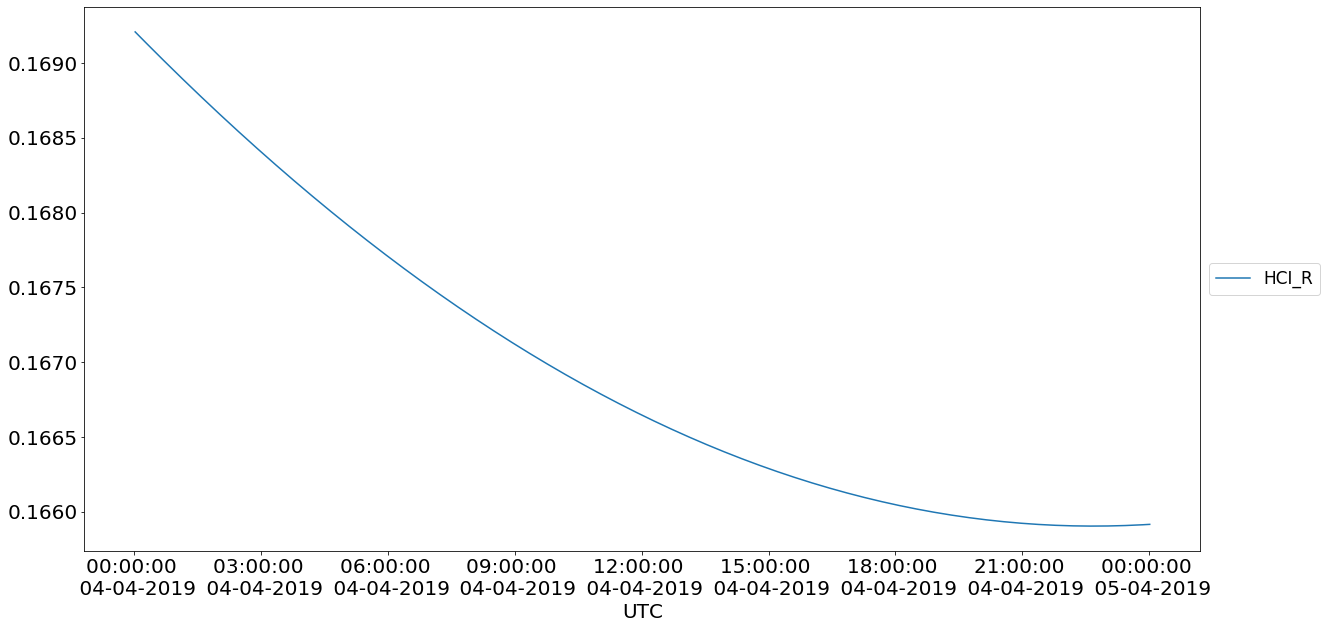

In [29]:
plot(let1,'HCI_R' )

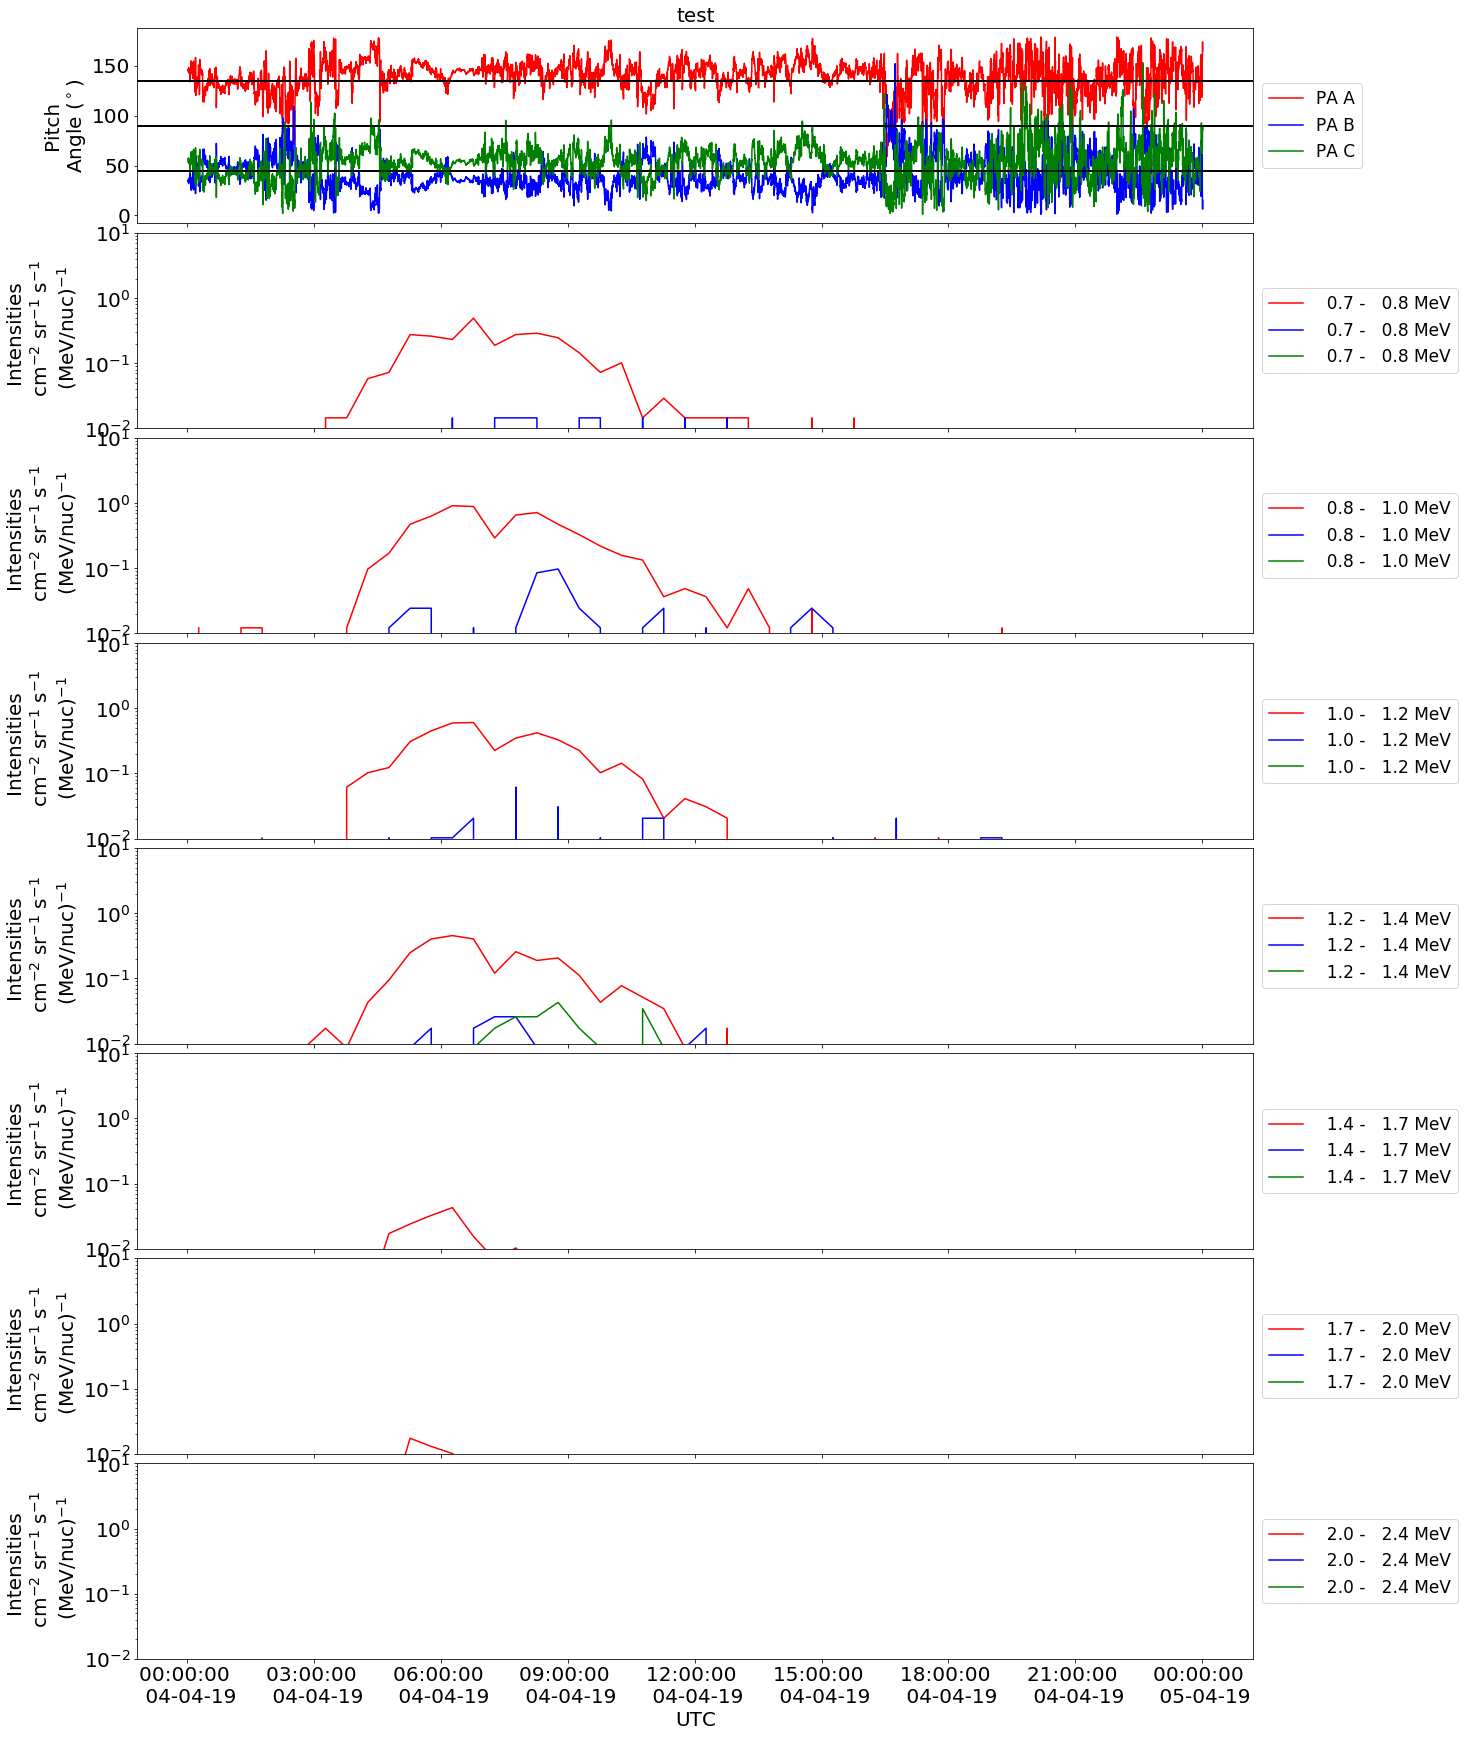

In [30]:
plot_pa_flux(let1 , let2, title = 'test' , e_bins = [1,2,3,4,8,9,10] , wanted_resolution = 1800, data_resolution = 10)

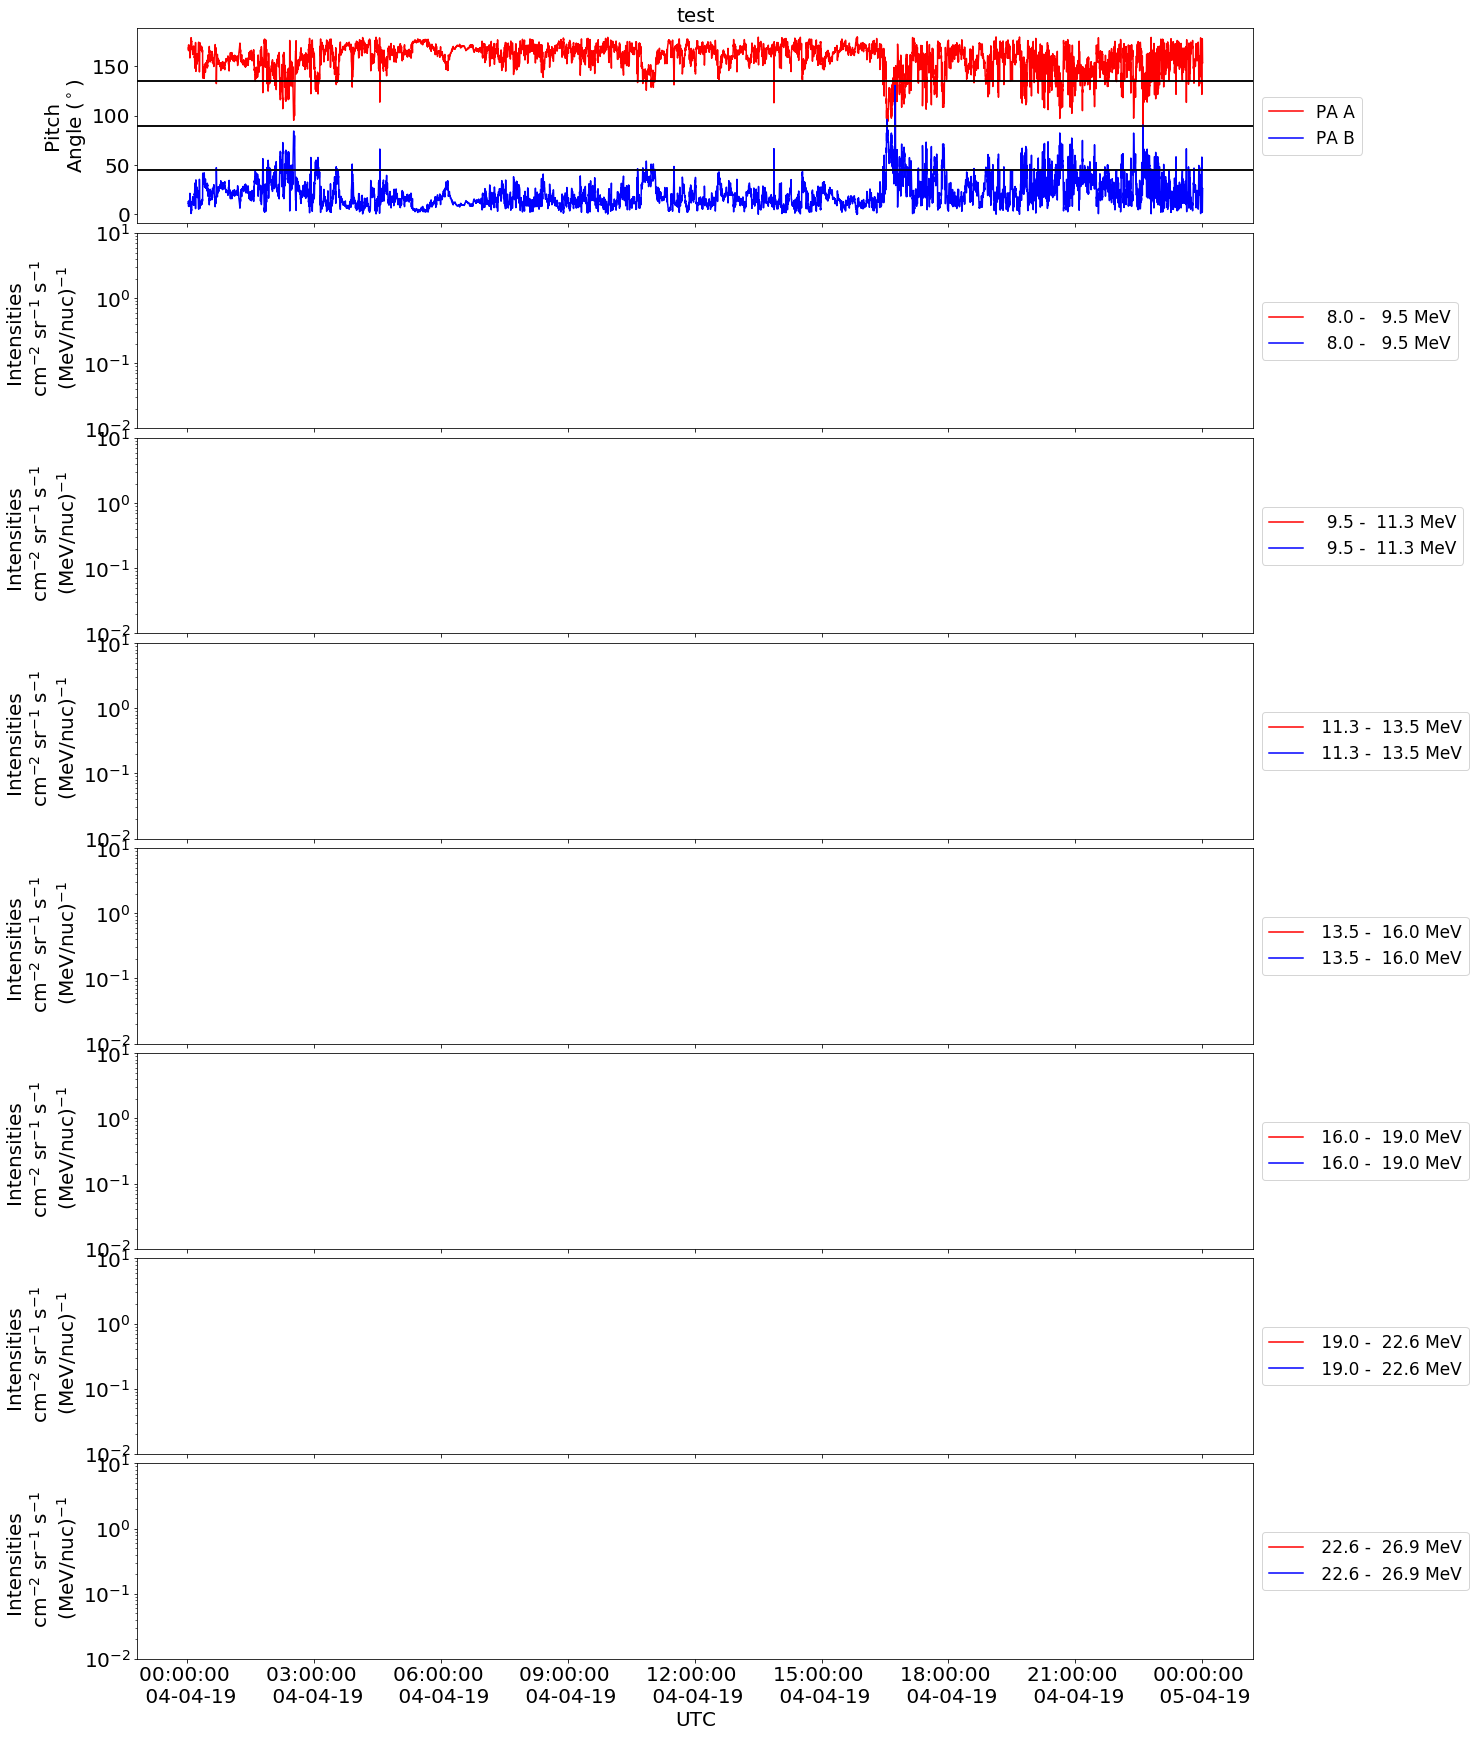

In [31]:
plot_pa_flux(het = het, title = 'test' , e_bins = [1,2,3,4,8,9,10] , wanted_resolution = 1800, data_resolution = 10)

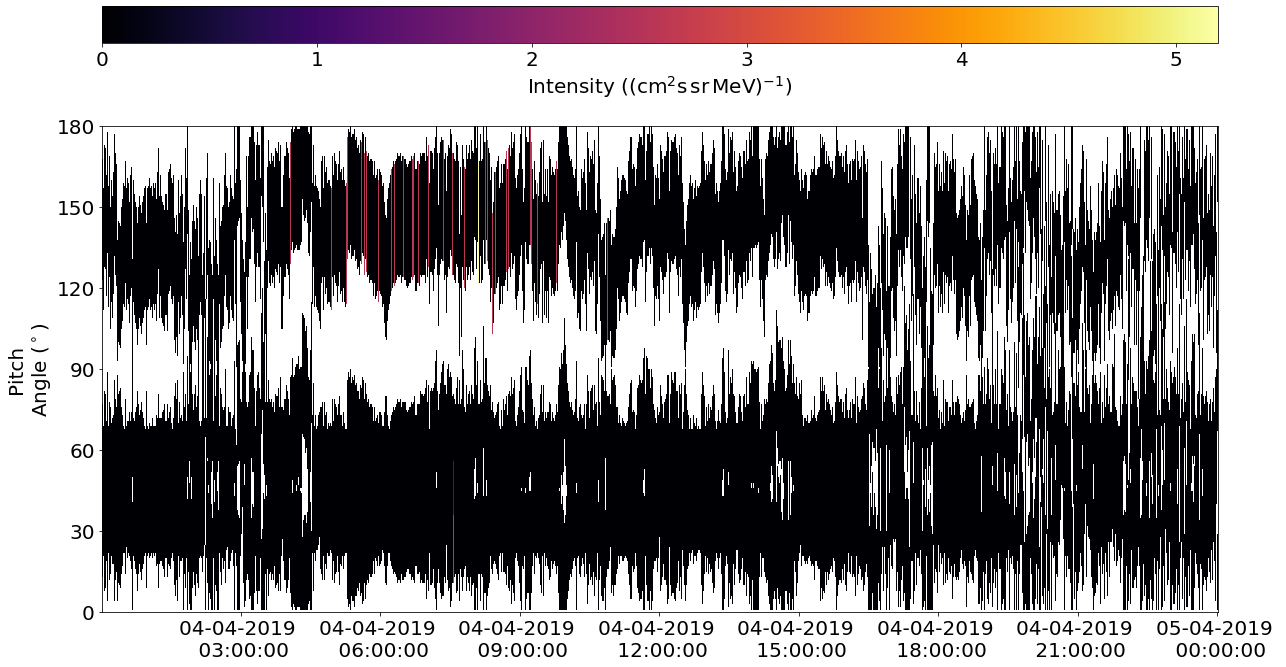

In [32]:
spec_plot_pa(let1, let2)

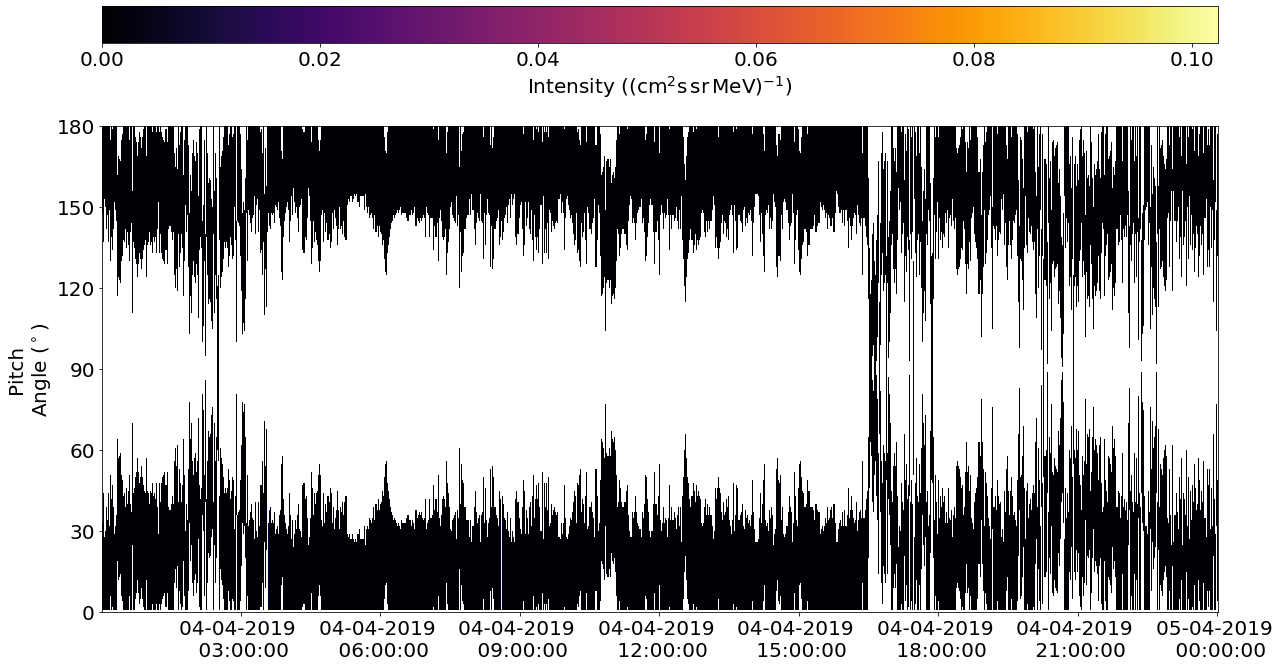

In [33]:
spec_plot_pa(het= het)

The file for 20201129, epihi, let1, rates60 is not available, check your input or choose another date!
The file for 20201129, epihi, let2, rates60 is not available, check your input or choose another date!
The file for 20201129, epihi, het, rates60 is not available, check your input or choose another date!
The file for 20201129, epihi, let1, rates10 is not available, check your input or choose another date!
File already present
Path to file: C:\Users\Omistaja\Desktop\SRL\2020SRL\two_day_plots\psp_isois-epihi_l2-let1-rates3600_20201129_v07.cdf
The chosen data resolution is not available, the file for rates3600was downloaded instead.
The file for 20201129, epihi, let2, rates10 is not available, check your input or choose another date!
File already present
Path to file: C:\Users\Omistaja\Desktop\SRL\2020SRL\two_day_plots\psp_isois-epihi_l2-let2-rates3600_20201129_v07.cdf
The chosen data resolution is not available, the file for rates3600was downloaded instead.
The file for 20201129, epihi

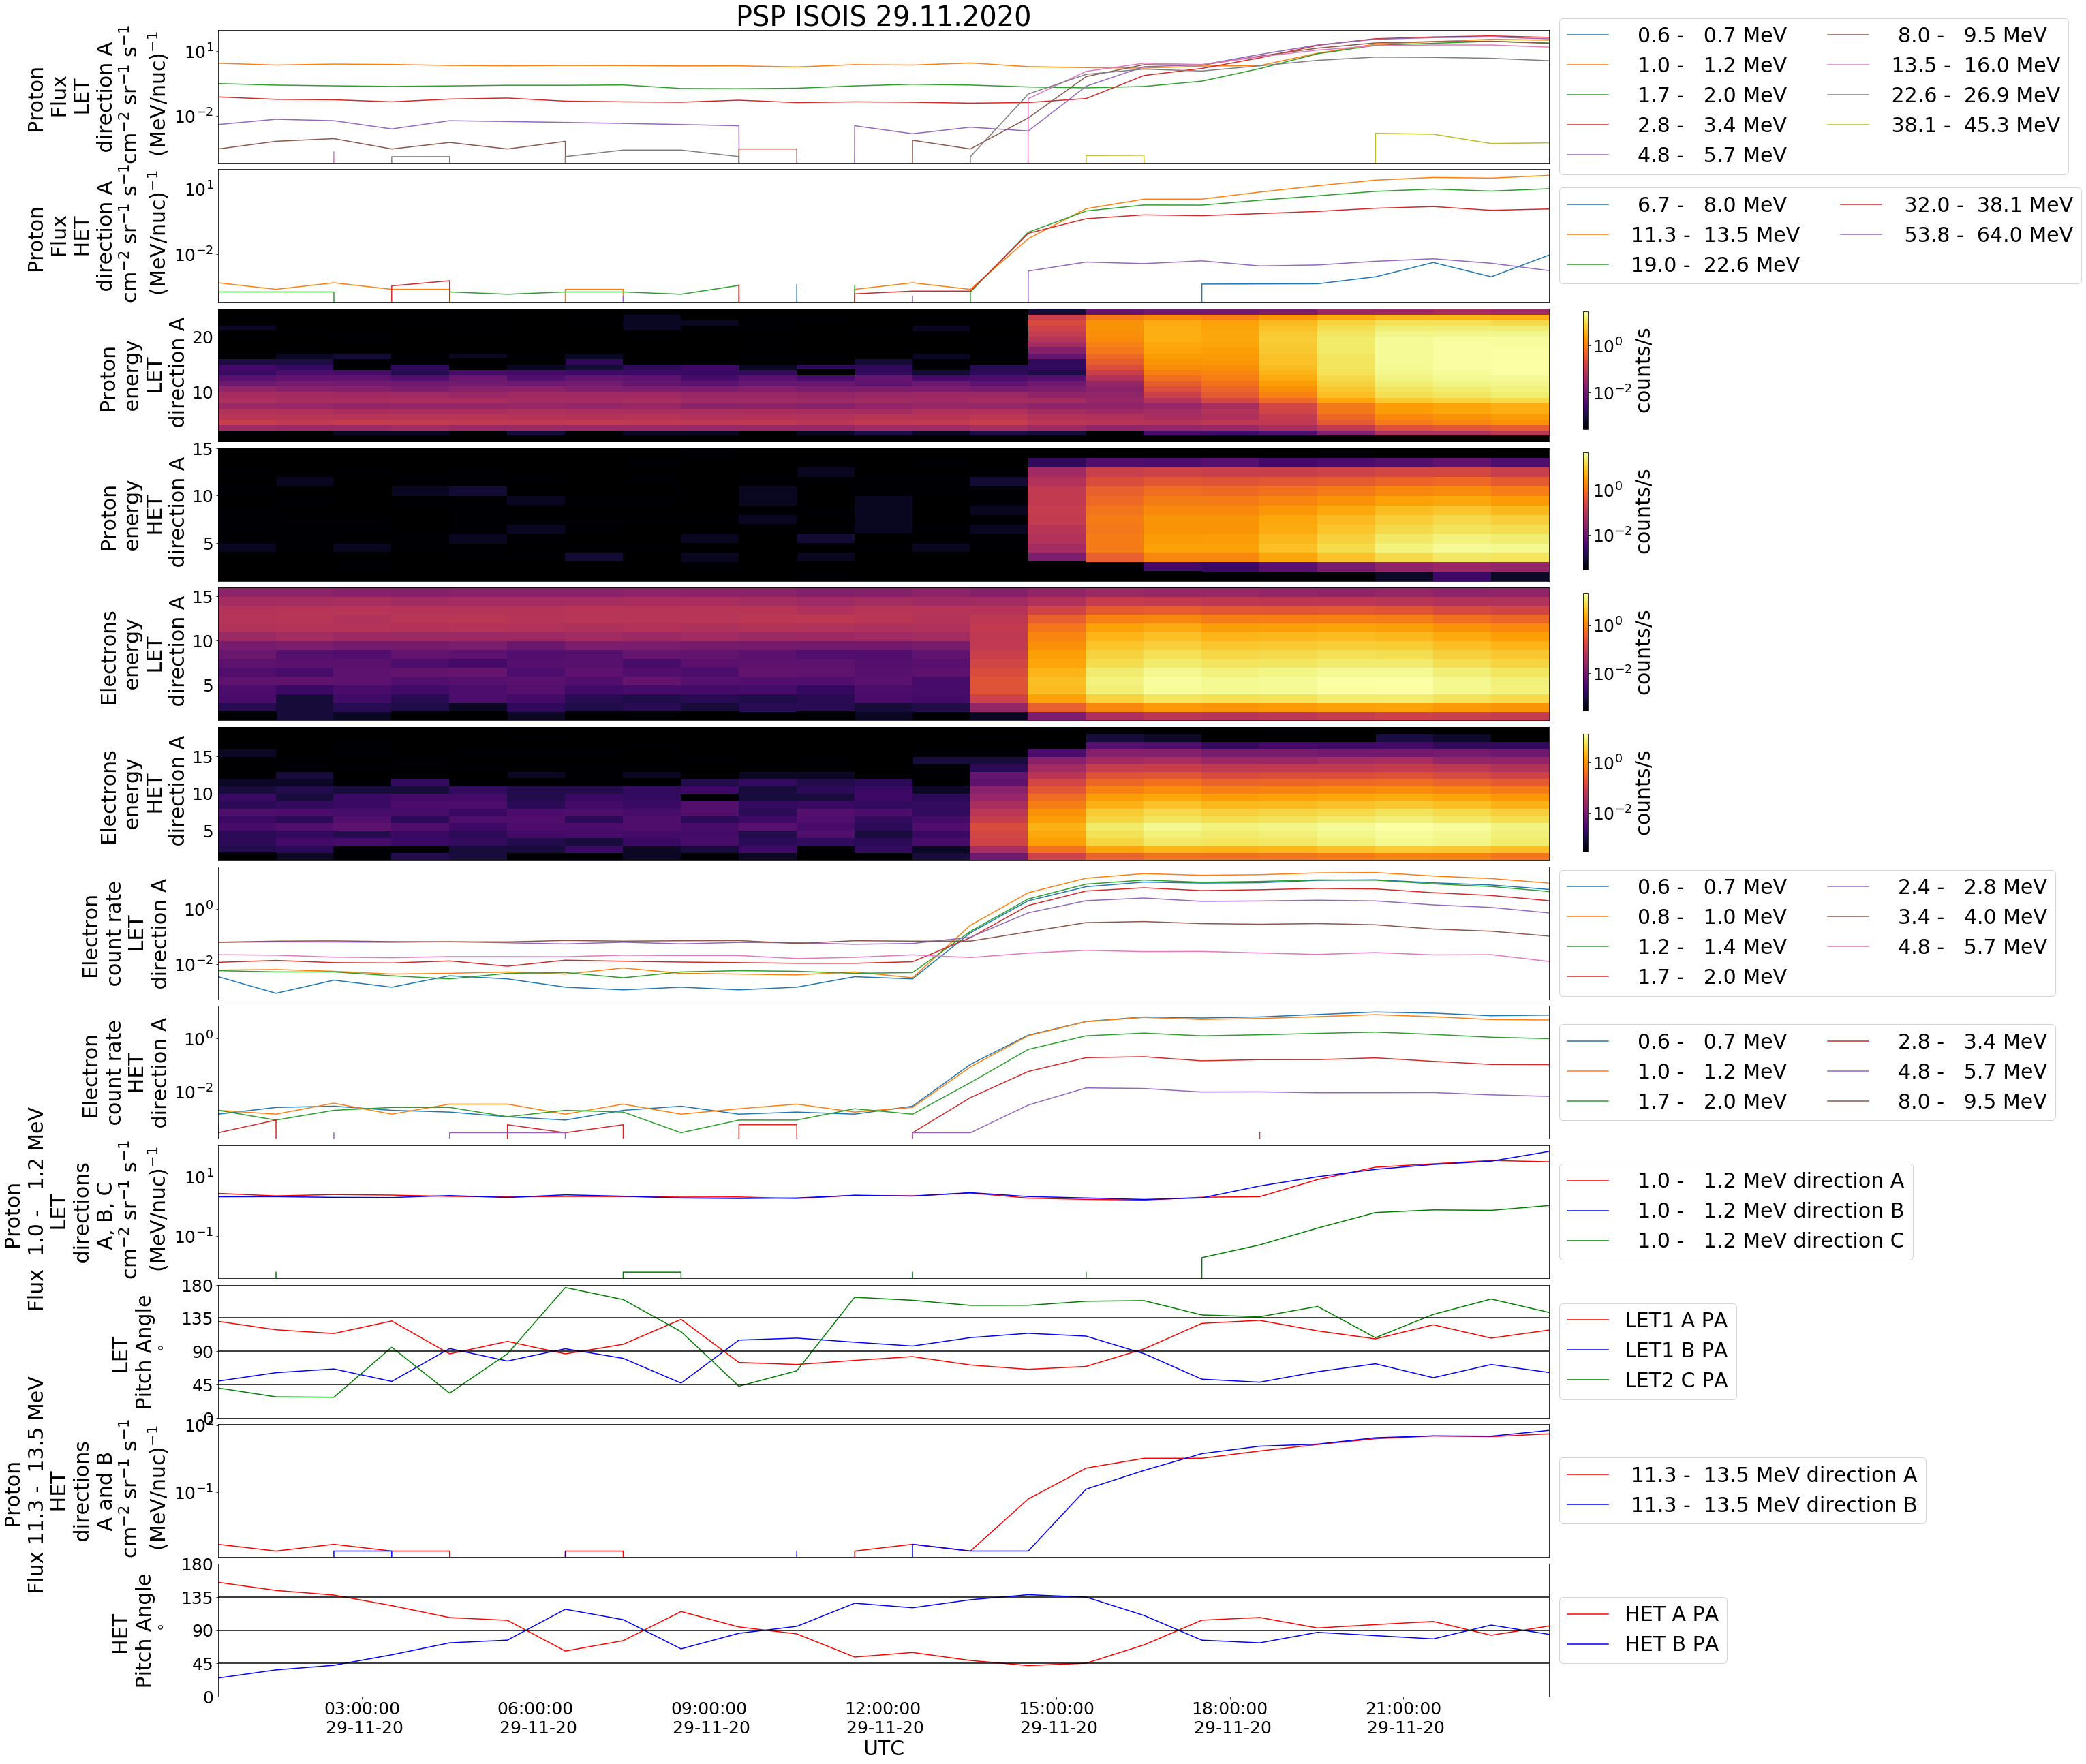

In [20]:
multipanel_v001( r'C:\Users\Omistaja\Desktop\SRL\2020SRL\two_day_plots', '20201129', 1) #data_resolution = 'rates10', plot_resolution = '300S')